the code below includes all spatial maps used in the manuscript, as well as other charts which we ultimately excluded from the paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
import matplotlib.ticker as mtick
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

#go to seaborn.pydata.org/examples to see examples of how to use it. 

In [2]:
catchments = gpd.read_file("WEAPCatchment.shp")
catchments = catchments.set_crs(epsg=4269)
# catchments

In [3]:
mapping_df = pd.read_csv('catchment_name mapping.csv')

# Create a mapping dictionary
mapping_dict = mapping_df.set_index('Original_name')['New_name'].to_dict()

# Update the 'name' column in the GeoPandas DataFrame
for index, row in catchments.iterrows():
    if row['Name'] in mapping_dict:
        catchments.at[index, 'Name'] = mapping_dict[row['Name']]

# Now, the 'name' column in the GeoPandas DataFrame is updated with the new names.
# catchments

In [4]:
states = gpd.read_file("cb_2018_us_state_500k.shp")

western_states = states[states['NAME'].isin([
    'California', 'Oregon', 'Washington', 'Nevada', 'Arizona', 'Utah',
    'Idaho', 'Montana', 'Wyoming', 'Colorado', 'New Mexico'
])]

# colorado = states[states['NAME'].isin([
#     'Colorado'
# ])]

# western_states

In [5]:
df = pd.read_csv("Cooling + Hydropower and Water Load Scenariosmonthly_TavgPrecip_all_Scenarios_fixed refloca (hist).csv", dtype=object)

In [6]:
df['tavg.C'] = df['tavg.C'].astype(float)
df['total_catchment_area_km2'] = df['total_catchment_area_km2'].astype(float)
df['Precip_km3'] = df['Precip_km3'].astype(float)
df['avg_Precip_km3'] = df['avg_Precip_km3'].astype(float)
df['avg_tavg.C'] = df['avg_tavg.C'].astype(float)
df['Year'] = df['Year'].astype(int)
df = df[(df['Year'] >=2020) & (df['Year'] <= 2070)]
# df
# print(df.dtypes)

In [7]:
#turn each row of catchment data into an aggregate df
df_catchment_data = df.groupby(['Catchment_name', 'Scenario']).sum()
df_catchment_data = df_catchment_data.reset_index()
df_catchment_data = df_catchment_data.drop(['Year', 'Month'], axis = 1)
df_catchment_data['State'] = df_catchment_data['State'].str[:2]
df_catchment_data['Region'] = df_catchment_data['Region'].str[:2]
df_catchment_data[['tavg.C', 'total_catchment_area_km2', 'Precip_km3', 'avg_Precip_km3', 'avg_tavg.C']] /= 612
df_catchment_data = df_catchment_data.drop('Catchment_num', axis=1)
df_catchment_data = df_catchment_data.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])

In [8]:
pd.set_option('display.max_rows', 20)
df_catchment_data

,Catchment_name,Scenario,tavg.C,total_catchment_area_km2,Precip_km3,avg_Precip_km3,avg_tavg.C,State,Region
0,AZ_APS_E_Upr Salt,CESM1-BGC,14.598487,15033.62,0.720082,0.719836,14.593831,AZ,SW
1,AZ_APS_E_Upr Salt,CMCC-CM,14.834393,15033.62,0.611278,0.610365,14.815967,AZ,SW
2,AZ_APS_E_Upr Salt,CanESM,15.444744,15033.62,0.806136,0.802435,15.441384,AZ,SW
3,AZ_APS_E_Upr Salt,Hist,12.122414,15033.62,0.756965,0.756965,12.122414,AZ,SW
4,AZ_APS_N_Aqua Fria,CESM1-BGC,18.801209,3790.84,0.145633,0.145590,18.801739,AZ,SW
...,...,...,...,...,...,...,...,...,...
1015,WY_SE_North Fork Platte,Hist,7.075982,12520.36,0.393648,0.393648,7.075982,WY,MT
1016,WY_SW_Upper Green,CESM1-BGC,4.207705,38982.78,1.147038,1.154735,4.221149,WY,MT
1017,WY_SW_Upper Green,CMCC-CM,3.768905,38982.78,1.117608,1.120410,3.749320,WY,MT
1018,WY_SW_Upper Green,CanESM,4.666753,38982.78,1.360637,1.356100,4.653518,WY,MT


In [9]:
# Access the individual DataFrames
df_catchment_CanESM = df_catchment_data[df_catchment_data['Scenario'] == 'CanESM']
df_catchment_CESM1BGC = df_catchment_data[df_catchment_data['Scenario'] == 'CESM1-BGC']
df_catchment_CMCCCM = df_catchment_data[df_catchment_data['Scenario'] == 'CMCC-CM']
df_catchment_RefLOCA = df_catchment_data[df_catchment_data['Scenario'] == 'Hist']
# df_catchment_CESM1BGC = scenario_dfs['CESM1-BGC']
# df_catchment_CMCCCM = scenario_dfs['CMCC-CM']
# df_catchment_RefLOCA = scenario_dfs['Hist']
df_catchment_RefLOCA

,Catchment_name,Scenario,tavg.C,total_catchment_area_km2,Precip_km3,avg_Precip_km3,avg_tavg.C,State,Region
3,AZ_APS_E_Upr Salt,Hist,12.122414,15033.62,0.756965,0.756965,12.122414,AZ,SW
7,AZ_APS_N_Aqua Fria,Hist,16.533762,3790.84,0.151178,0.151178,16.533762,AZ,SW
11,AZ_APS_N_Middle Colorado,Hist,12.175789,107107.74,2.767682,2.767682,12.175789,AZ,SW
15,AZ_APS_N_Verde,Hist,12.204846,15100.85,0.609115,0.609115,12.204846,AZ,SW
19,AZ_APS_SW_Lwr Colorado,Hist,21.924919,20307.59,0.223447,0.223447,21.924919,AZ,SW
...,...,...,...,...,...,...,...,...,...
1003,WY_NW_Upper Wind,Hist,1.420407,20048.12,0.613440,0.613440,1.420407,WY,MT
1007,WY_NW_Yellowstone,Hist,-0.221432,2589.54,0.188632,0.188632,-0.221432,WY,MT
1011,WY_SE_Middle North Platte,Hist,4.996678,23440.05,0.785828,0.785828,4.996678,WY,MT
1015,WY_SE_North Fork Platte,Hist,7.075982,12520.36,0.393648,0.393648,7.075982,WY,MT


In [10]:
# # Group the DataFrame by 'Scenario'
# grouped_df = df_catchment_data.groupby('Scenario')

# scenario_dfs = {}

# # Iterate over unique scenario values and filter the DataFrame
# for scenario in df['Scenario'].unique():
#     scenario_dfs[scenario] = df[df['Scenario'] == scenario]

# # Access the individual DataFrames
# df_catchment_CanESM = scenario_dfs['CanESM']
# df_catchment_CESM1BGC = scenario_dfs['CESM1-BGC']
# df_catchment_CMCCCM = scenario_dfs['CMCC-CM']
# df_catchment_RefLOCA = scenario_dfs['Hist']

In [11]:
df_catchment_CanESM = df_catchment_CanESM.sort_values(by='Catchment_name').reset_index(drop=True)
df_catchment_CESM1BGC = df_catchment_CESM1BGC.sort_values(by='Catchment_name').reset_index(drop=True)
df_catchment_CMCCCM = df_catchment_CMCCCM.sort_values(by='Catchment_name').reset_index(drop=True)
df_catchment_RefLOCA = df_catchment_RefLOCA.sort_values(by='Catchment_name').reset_index(drop=True)
df_catchment_CMCCCM

,Catchment_name,Scenario,tavg.C,total_catchment_area_km2,Precip_km3,avg_Precip_km3,avg_tavg.C,State,Region
0,AZ_APS_E_Upr Salt,CMCC-CM,14.834393,15033.62,0.611278,0.610365,14.815967,AZ,SW
1,AZ_APS_N_Aqua Fria,CMCC-CM,19.059461,3790.84,0.130695,0.130371,19.035773,AZ,SW
2,AZ_APS_N_Middle Colorado,CMCC-CM,14.668313,107107.74,2.511543,2.517997,14.647573,AZ,SW
3,AZ_APS_N_Verde,CMCC-CM,14.833507,15100.85,0.521438,0.522033,14.810776,AZ,SW
4,AZ_APS_SW_Lwr Colorado,CMCC-CM,24.385409,20307.59,0.180684,0.180131,24.365448,AZ,SW
...,...,...,...,...,...,...,...,...,...
250,WY_NW_Upper Wind,CMCC-CM,3.711621,20048.12,0.593428,0.595358,3.688858,WY,MT
251,WY_NW_Yellowstone,CMCC-CM,1.914984,2589.54,0.182061,0.182683,1.891143,WY,MT
252,WY_SE_Middle North Platte,CMCC-CM,7.475836,23440.05,0.788121,0.791860,7.451415,WY,MT
253,WY_SE_North Fork Platte,CMCC-CM,9.447104,12520.36,0.387826,0.389640,9.421095,WY,MT


In [12]:
df_catchment_CanESM['precip_difference'] = 100*((df_catchment_CanESM['avg_Precip_km3'] - df_catchment_RefLOCA['avg_Precip_km3']) / df_catchment_RefLOCA['avg_Precip_km3'])
df_catchment_CESM1BGC['precip_difference'] = 100*((df_catchment_CESM1BGC['avg_Precip_km3'] - df_catchment_RefLOCA['avg_Precip_km3']) / df_catchment_RefLOCA['avg_Precip_km3'] )
df_catchment_CMCCCM['precip_difference'] = 100*((df_catchment_CMCCCM['avg_Precip_km3'] - df_catchment_RefLOCA['avg_Precip_km3']) / df_catchment_RefLOCA['avg_Precip_km3'])

df_catchment_CanESM['temp_difference'] = df_catchment_CanESM['avg_tavg.C'] - df_catchment_RefLOCA['avg_tavg.C']
df_catchment_CESM1BGC['temp_difference'] = df_catchment_CESM1BGC['avg_tavg.C'] - df_catchment_RefLOCA['avg_tavg.C'] 
df_catchment_CMCCCM['temp_difference'] = df_catchment_CMCCCM['avg_tavg.C'] - df_catchment_RefLOCA['avg_tavg.C'] 

In [13]:
# pd.set_option('display.max_rows', None)
# df_catchment_CanESM

In [14]:
# min_value = df_catchment_CESM1BGC['temp_difference'].max()

# # Print the minimum value
# print(min_value)

In [15]:
catchments_CanESM = catchments.merge(df_catchment_CanESM, left_on = 'Name', right_on = 'Catchment_name')
catchments_CESM1BGC = catchments.merge(df_catchment_CESM1BGC, left_on = 'Name', right_on = 'Catchment_name')
catchments_CMCCCM = catchments.merge(df_catchment_CMCCCM, left_on = 'Name', right_on = 'Catchment_name')
# print(catchments_CanESM.dtypes)

In [16]:
# # Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames
# fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
# norm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=2)

# catchments_CanESM.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# # Plot the second GeoDataFrame with transparency and edge color
# western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

# ax.set_axis_off()
# # plt.colorbar(sm, cax=cax, label='test')  # Add a label to the legend
# # Create the legend
# legend = plt.legend()

# # Set the title of the legend
# legend.set_title('Precipitation Difference')

# plt.title('Percent change in precipitation in CanESM scenario', fontsize=16)
# plt.show()

In [17]:
# western_states['2070 CanESM Groundwater']

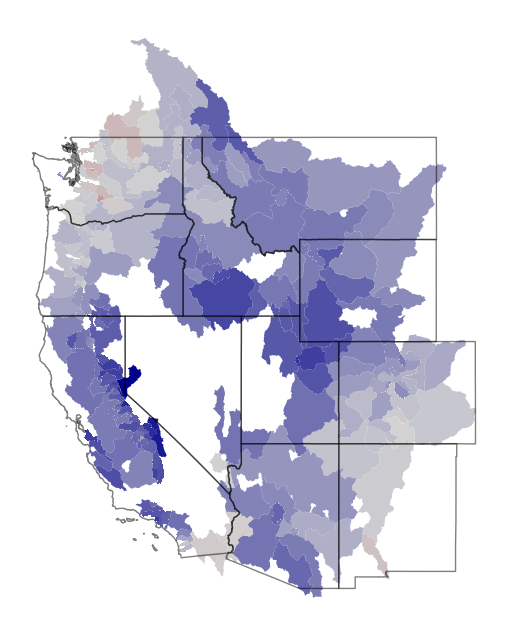

In [188]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

catchments_CanESM.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([]) # You have to set a dummy-array for ScalarMappable

# cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=40) # Add a colorbar horizontally
# cbar.ax.xaxis.set_ticks_position('bottom') # Ensure ticks are on the bottom
# cbar.ax.xaxis.set_label_position('bottom') # Ensure the label is on the bottom
# cbar.set_label('Cumulative percentage change in precipitation, 2020 to 2070', size=12)

# plt.title('Percent change in precipitation in Hot and Wet scenario', fontsize=16)
plt.show()



# # Plot and get the mappable object
# mappable = catchments_CanESM.plot(column='precip_difference', cmap=cmap, norm=norm, ax=ax, legend=False) # legend=False here

# # Plot the second GeoDataFrame with transparency and edge color
# western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

# ax.set_axis_off()

# # Create a legend separately and place it below
# import matplotlib.patches as mpatches
# import numpy as np

# # Create a dummy ScalarMappable to use for the colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([]) # You have to set a dummy-array for ScalarMappable

# cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=40) # Add a colorbar horizontally
# cbar.ax.xaxis.set_ticks_position('bottom') # Ensure ticks are on the bottom
# cbar.ax.xaxis.set_label_position('bottom') # Ensure the label is on the bottom

# plt.show()

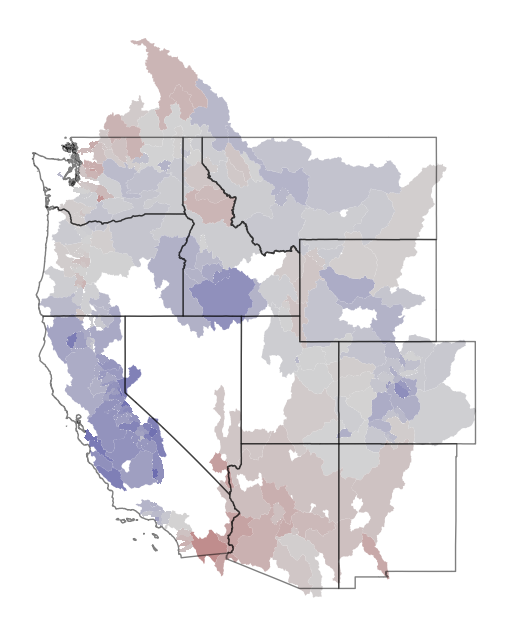

In [189]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

catchments_CESM1BGC.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

# # Create the colorbar with a custom label formatter
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # This is necessary to create the colorbar

# plt.title('Percent change in precipitation in Warm and Stable scenario', fontsize=16)
plt.show()

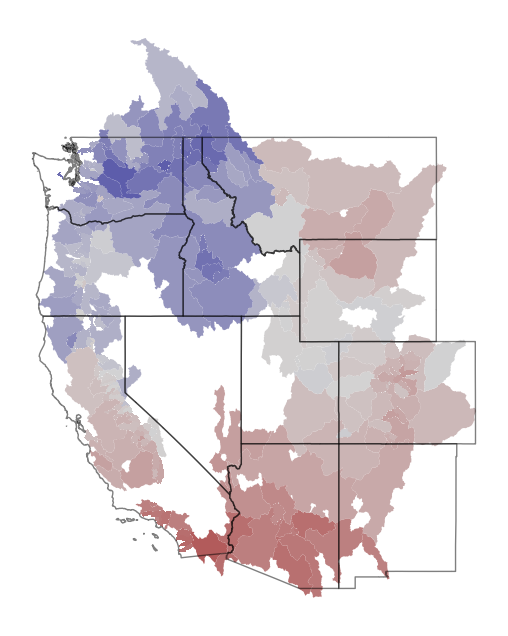

In [190]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

catchments_CMCCCM.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

# # Create the colorbar with a custom label formatter
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # This is necessary to create the colorbar

# plt.title('Percent change in precipitation in Warm and Divergent scenario', fontsize=16)
plt.show()

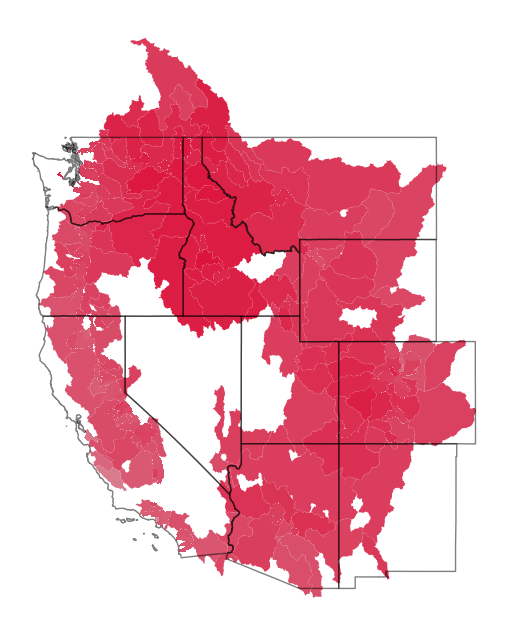

In [191]:
# Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#D3D3D3', '#DC143C'])
norm = colors.Normalize(vmin=1.3, vmax=3.7)

catchments_CanESM.plot(column='temp_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)


# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()
# plt.colorbar(sm, cax=cax, label='')  # Add a label to the legend

# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([]) # You have to set a dummy-array for ScalarMappable

# cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=40) # Add a colorbar horizontally
# cbar.ax.xaxis.set_ticks_position('bottom') # Ensure ticks are on the bottom
# cbar.ax.xaxis.set_label_position('bottom') # Ensure the label is on the bottom
# cbar.set_label('Average temperature change (°C), 2020 to 2070', size=12)


# plt.title('Change in temperature (°C) in Hot and Wet scenario', fontsize=16)
plt.show()

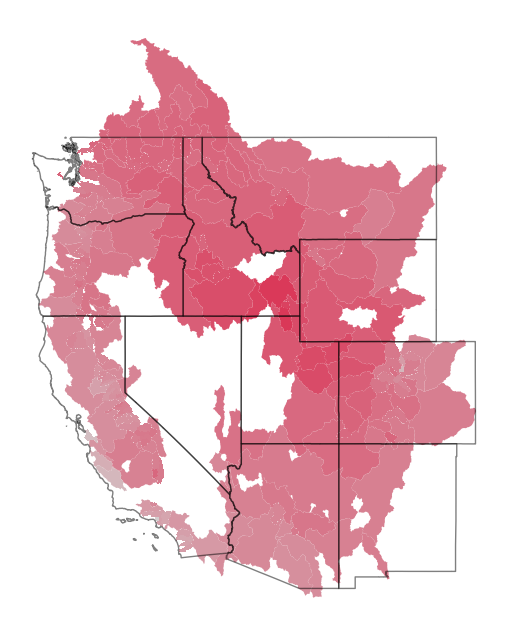

In [192]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#D3D3D3', '#DC143C'])
norm = colors.Normalize(vmin=1.3, vmax=3.7)

catchments_CESM1BGC.plot(column='temp_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()
# plt.colorbar(sm, cax=cax, label='')  # Add a label to the legend

# plt.title('Change in temperature (°C) in Warm and Stable scenario', fontsize=16)
plt.show()

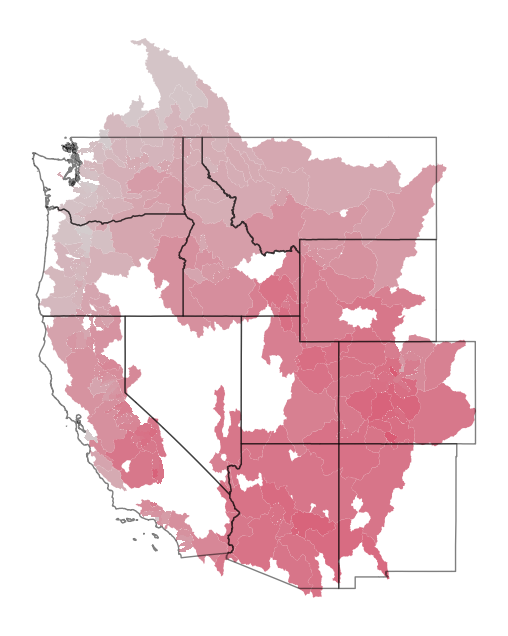

In [193]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#D3D3D3', '#DC143C'])
norm = colors.Normalize(vmin=1.3, vmax=3.7)

catchments_CMCCCM.plot(column='temp_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=False)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()
# plt.colorbar(sm, cax=cax, label='')  # Add a label to the legend

# plt.title('Change in temperature (°C) in in Warm and Divergent scenario', fontsize=16)
plt.show()

In [24]:
dfGroundwater = pd.read_csv("groundwater_data_for_chloropleth.csv", dtype=object)
dfGroundwater['Year'] = dfGroundwater['Year'].astype(int)
for col in dfGroundwater.columns[2:]:
    dfGroundwater[col] = dfGroundwater[col].astype(float)

dfGroundwater

,Scenario,Year,AZ,CA,CO,ID,MT,NM,NV,OR,UT,WA,WY,Total
0,CanESM,2070,100201269.0,358637492.0,82820237.0,147630909.0,139477655.0,31553855.0,20376201.0,146375634.0,39679368.0,147903231.0,30620966.0,1.245277e+09
1,CanESM - Max MAR,2070,99982050.0,530224197.0,83709235.0,170375686.0,144683319.0,31551506.0,20134198.0,177815134.0,55668080.0,152996549.0,30988077.0,1.498128e+09
2,CESM1-BGC,2070,91272760.0,343371172.0,83117100.0,136229675.0,126341327.0,31710036.0,16733678.0,140143868.0,31924094.0,141036317.0,26985145.0,1.168865e+09
3,CESM1-BGC - Max MAR,2070,91311110.0,424808487.0,83818730.0,138556066.0,126457142.0,32081722.0,16736055.0,146712766.0,36115527.0,141144979.0,27157762.0,1.264900e+09
4,CMCC-CM,2070,83284302.0,304089254.0,66795745.0,140713062.0,123848920.0,31853665.0,16161233.0,144284791.0,33627987.0,147289771.0,26609334.0,1.118558e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,CESM1-BGC,2050,98749653.0,360419169.0,96094399.0,142243947.0,131792613.0,33016996.0,17046933.0,146381525.0,36194798.0,144617817.0,28621880.0,1.235180e+09
17,CESM1-BGC - Max MAR,2050,98764681.0,424980396.0,96261331.0,143976079.0,133412836.0,33037273.0,17046508.0,157180458.0,39502408.0,146436711.0,29613229.0,1.320212e+09
18,CMCC-CM,2050,84730879.0,322160883.0,82495292.0,152921802.0,132831302.0,31791243.0,15470563.0,153980910.0,36689267.0,157115785.0,28771774.0,1.198960e+09
19,CMCC-CM - Max MAR,2050,84724783.0,326495211.0,82480833.0,160741661.0,135185989.0,31826159.0,15475946.0,197406702.0,38823303.0,253015301.0,28884870.0,1.355061e+09


In [25]:
CanESM2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM') & (dfGroundwater['Year'] == 2070)]
CESM1BGC2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC') & (dfGroundwater['Year'] == 2070)]
CMCCCM2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM') & (dfGroundwater['Year'] == 2070)]
RefLOCA2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'RefLOCA') & (dfGroundwater['Year'] == 2070)]

In [26]:
western_states['2070 CanESM Groundwater'] = None
western_states['2070 CESM1BGC Groundwater'] = None
western_states['2070 CMCCCM Groundwater'] = None

C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is tryin

In [27]:
CanESM_series = pd.Series(CanESM2070.iloc[0])
CESM1BGC_series = pd.Series(CESM1BGC2070.iloc[0])
CMCCCM_series = pd.Series(CMCCCM2070.iloc[0])
RefLOCA_series = pd.Series(RefLOCA2070.iloc[0])


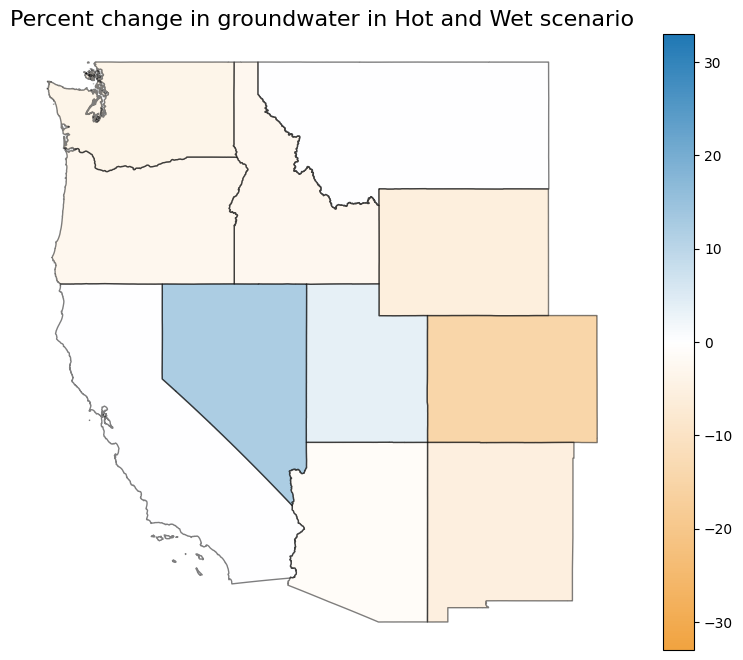

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#f1a340', 'white', '#1f78b4'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

western_states.plot(column='2070 CanESM Groundwater', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

plt.title('Percent change in groundwater in Hot and Wet scenario', fontsize=16)
plt.show()

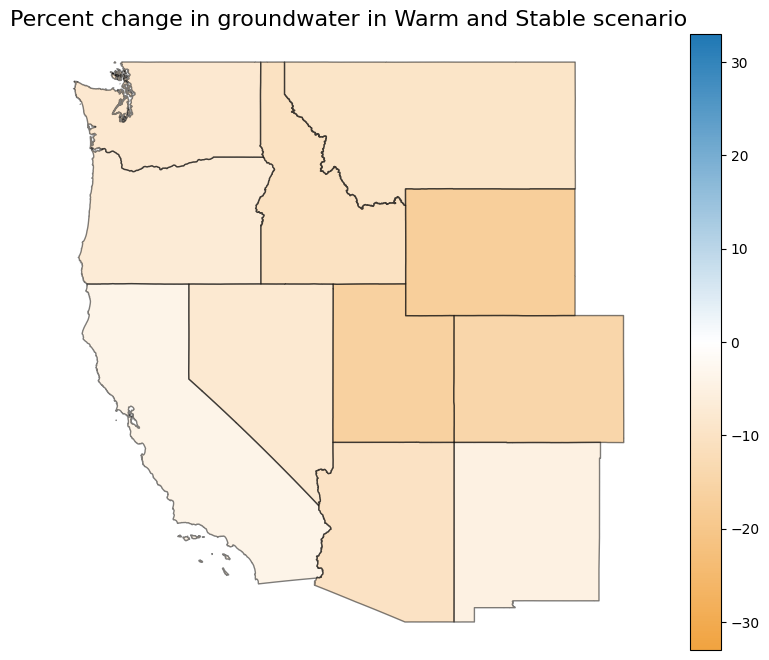

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#f1a340', 'white', '#1f78b4'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

western_states.plot(column='2070 CESM1BGC Groundwater', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

plt.title('Percent change in groundwater in Warm and Stable scenario', fontsize=16)
plt.show()

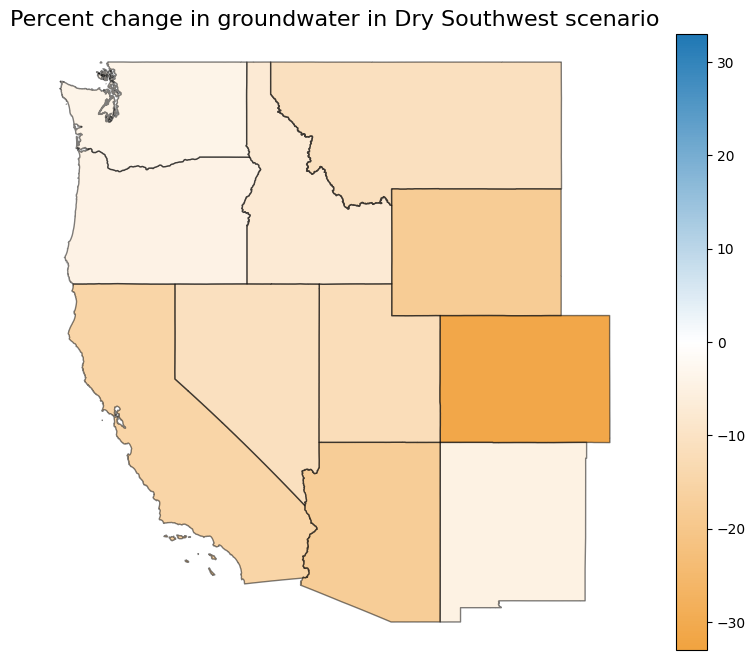

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#f1a340', 'white', '#1f78b4'])
norm = colors.TwoSlopeNorm(vmin=-33, vcenter=0, vmax=33)

western_states.plot(column='2070 CMCCCM Groundwater', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

ax.set_axis_off()

plt.title('Percent change in groundwater in Dry Southwest scenario', fontsize=16)
plt.show()

In [32]:
CanESM2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM') & (dfGroundwater['Year'] == 2070)]
CESM1BGC2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC') & (dfGroundwater['Year'] == 2070)]
CMCCCM2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM') & (dfGroundwater['Year'] == 2070)]
# RefLOCA2070 = dfGroundwater[(dfGroundwater['Scenario'] == 'RefLOCA') & (dfGroundwater['Year'] == 2070)]

CanESM2060 = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM') & (dfGroundwater['Year'] == 2060)]
CESM1BGC2060 = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC') & (dfGroundwater['Year'] == 2060)]
CMCCCM2060 = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM') & (dfGroundwater['Year'] == 2060)]
# RefLOCA2060 = dfGroundwater[(dfGroundwater['Scenario'] == 'RefLOCA') & (dfGroundwater['Year'] == 2060)]

CanESM2050 = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM') & (dfGroundwater['Year'] == 2050)]
CESM1BGC2050 = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC') & (dfGroundwater['Year'] == 2050)]
CMCCCM2050 = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM') & (dfGroundwater['Year'] == 2050)]
# RefLOCA2050 = dfGroundwater[(dfGroundwater['Scenario'] == 'RefLOCA') & (dfGroundwater['Year'] == 2050)]

CanESM2070_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM - Max MAR') & (dfGroundwater['Year'] == 2070)]
CESM1BGC2070_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC - Max MAR') & (dfGroundwater['Year'] == 2070)]
CMCCCM2070_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM - Max MAR') & (dfGroundwater['Year'] == 2070)]

CanESM2060_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM - Max MAR') & (dfGroundwater['Year'] == 2060)]
CESM1BGC2060_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC - Max MAR') & (dfGroundwater['Year'] == 2060)]
CMCCCM2060_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM - Max MAR') & (dfGroundwater['Year'] == 2060)]

CanESM2050_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CanESM - Max MAR') & (dfGroundwater['Year'] == 2050)]
CESM1BGC2050_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CESM1-BGC - Max MAR') & (dfGroundwater['Year'] == 2050)]
CMCCCM2050_mar = dfGroundwater[(dfGroundwater['Scenario'] == 'CMCC-CM - Max MAR') & (dfGroundwater['Year'] == 2050)]

In [33]:
CanESM2070_series = pd.Series(CanESM2070.iloc[0])
CESM1BGC2070_series = pd.Series(CESM1BGC2070.iloc[0])
CMCCCM2070_series = pd.Series(CMCCCM2070.iloc[0])

CanESM2060_series = pd.Series(CanESM2060.iloc[0])
CESM1BGC2060_series = pd.Series(CESM1BGC2060.iloc[0])
CMCCCM2060_series = pd.Series(CMCCCM2060.iloc[0])

CanESM2050_series = pd.Series(CanESM2050.iloc[0])
CESM1BGC2050_series = pd.Series(CESM1BGC2050.iloc[0])
CMCCCM2050_series = pd.Series(CMCCCM2050.iloc[0])

CanESM2070mar_series = pd.Series(CanESM2070_mar.iloc[0])
CESM1BGC2070mar_series = pd.Series(CESM1BGC2070_mar.iloc[0])
CMCCCM2070mar_series = pd.Series(CMCCCM2070_mar.iloc[0])

CanESM2060mar_series = pd.Series(CanESM2060_mar.iloc[0])
CESM1BGC2060mar_series = pd.Series(CESM1BGC2060_mar.iloc[0])
CMCCCM2060mar_series = pd.Series(CMCCCM2060_mar.iloc[0])

CanESM2050mar_series = pd.Series(CanESM2050_mar.iloc[0])
CESM1BGC2050mar_series = pd.Series(CESM1BGC2050_mar.iloc[0])
CMCCCM2050mar_series = pd.Series(CMCCCM2050_mar.iloc[0])
# RefLOCA_series = pd.Series(RefLOCA2070.iloc[0])


In [34]:
western_states['2070 CanESM MAR vs no adaptation'] = pd.Series(dtype='float64')
western_states['2070 CESM1BGC MAR vs no adaptation'] = None
western_states['2070 CMCCCM MAR vs no adaptation'] = None

western_states['2060 CanESM MAR vs no adaptation'] = None
western_states['2060 CESM1BGC MAR vs no adaptation'] = None
western_states['2060 CMCCCM MAR vs no adaptation'] = None

western_states['2050 CanESM MAR vs no adaptation'] = None
western_states['2050 CESM1BGC MAR vs no adaptation'] = None
western_states['2050 CMCCCM MAR vs no adaptation'] = None

C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is tryin

In [35]:
state_abbreviations = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
state_names = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'New Mexico', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming']

climate_series = [CanESM2070_series, CESM1BGC2070_series, CMCCCM2070_series, 
                  CanESM2060_series, CESM1BGC2060_series, CMCCCM2060_series, 
                  CanESM2050_series, CESM1BGC2050_series, CMCCCM2050_series] 

mar_series = [CanESM2070mar_series, CESM1BGC2070mar_series, CMCCCM2070mar_series, 
              CanESM2060mar_series, CESM1BGC2060mar_series, CMCCCM2060mar_series, 
              CanESM2050mar_series, CESM1BGC2050mar_series, CMCCCM2050mar_series]

column_series = ['2070 CanESM MAR vs no adaptation', '2070 CESM1BGC MAR vs no adaptation', '2070 CMCCCM MAR vs no adaptation',
                 '2060 CanESM MAR vs no adaptation', '2060 CESM1BGC MAR vs no adaptation', '2060 CMCCCM MAR vs no adaptation',
                 '2050 CanESM MAR vs no adaptation', '2050 CESM1BGC MAR vs no adaptation', '2050 CMCCCM MAR vs no adaptation']

for i,j in zip(state_abbreviations, state_names):
    for climate_value, mar_value, column_name in zip(climate_series, mar_series, column_series):
        gw_value = ((mar_value[i] / climate_value[i]) - 1)*100
        western_states.loc[western_states['NAME'] == j, column_name] = gw_value

western_states['2070 CanESM MAR vs no adaptation'] = western_states['2070 CanESM MAR vs no adaptation'].astype(float)
western_states['2070 CESM1BGC MAR vs no adaptation'] = western_states['2070 CESM1BGC MAR vs no adaptation'].astype(float)
western_states['2070 CMCCCM MAR vs no adaptation'] = western_states['2070 CMCCCM MAR vs no adaptation'].astype(float)

western_states['2060 CanESM MAR vs no adaptation'] = western_states['2060 CanESM MAR vs no adaptation'].astype(float)
western_states['2060 CESM1BGC MAR vs no adaptation'] = western_states['2060 CESM1BGC MAR vs no adaptation'].astype(float)
western_states['2060 CMCCCM MAR vs no adaptation'] = western_states['2060 CMCCCM MAR vs no adaptation'].astype(float)

western_states['2050 CanESM MAR vs no adaptation'] = western_states['2050 CanESM MAR vs no adaptation'].astype(float)
western_states['2050 CESM1BGC MAR vs no adaptation'] = western_states['2050 CESM1BGC MAR vs no adaptation'].astype(float)
western_states['2050 CMCCCM MAR vs no adaptation'] = western_states['2050 CMCCCM MAR vs no adaptation'].astype(float)

western_states

# value = ((CanESM2070_series['AZ'] / CanESM2070mar_series['AZ']) - 1)*100
# western_states.loc[western_states['NAME'] == 'Arizona', '2070 CanESM MAR vs no adaptation'] = value

# western_states

C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is tryin

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2070 CMCCCM Groundwater,2070 CanESM MAR vs no adaptation,2070 CESM1BGC MAR vs no adaptation,2070 CMCCCM MAR vs no adaptation,2060 CanESM MAR vs no adaptation,2060 CESM1BGC MAR vs no adaptation,2060 CMCCCM MAR vs no adaptation,2050 CanESM MAR vs no adaptation,2050 CESM1BGC MAR vs no adaptation,2050 CMCCCM MAR vs no adaptation
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",...,-7.367349,15.406514,1.707698,2.744469,8.454808,0.913850,5.915318,14.428690,1.217719,5.113633
11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.57039 48.53785, -122.5686...",...,-4.118230,3.443683,0.077045,8.855808,5.131742,0.248275,40.083019,9.011448,1.257725,61.037480
12,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995...",...,-4.698645,-0.007444,1.172140,-0.072846,0.018059,-0.000527,0.065590,-0.003811,0.061414,0.109829
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",...,-15.023881,47.844051,23.716992,4.065399,11.737956,19.094500,1.596000,7.393741,17.912817,1.345392
21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,-31.301724,1.073407,0.844146,1.093760,0.381531,0.144355,0.321340,0.522085,0.173717,-0.017527
22,49,01455989,0400000US49,49,UT,Utah,00,212886221680,6998824394,"POLYGON ((-114.05296 37.59278, -114.05247 37.6...",...,-11.997371,40.294775,13.129372,16.905564,30.159971,9.540140,5.996669,24.965619,9.138357,5.816513
24,56,01779807,0400000US56,56,WY,Wyoming,00,251458544898,1867670745,"POLYGON ((-111.05456 45.00096, -111.04507 45.0...",...,-18.190367,1.198888,0.639674,0.075233,2.375265,1.504350,0.164933,5.203255,3.463605,0.393080
28,32,01779793,0400000US32,32,NV,Nevada,00,284329506470,2047206072,"POLYGON ((-120.00574 39.22866, -120.00559 39.2...",...,-10.907684,-1.187675,0.014205,-0.006887,0.058575,0.040028,-0.016044,0.187723,-0.002493,0.034795
31,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,"POLYGON ((-116.04914 48.50205, -116.04913 48.5...",...,-11.082337,3.732257,0.091668,0.199491,3.769936,0.865190,0.656154,8.832741,1.229373,1.772690
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",...,-17.941140,-0.218779,0.042017,-0.116885,-0.024680,0.057663,-0.073211,-0.103010,0.015218,-0.007195


In [202]:
def make_state_gw_maps (column_name):
    
    fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis
    
    cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', '#00008B'])
    norm = colors.Normalize(vmin=0, vmax=33)
    
    western_states.plot(column=column_name, cmap=cmap, norm=norm, ax=plt.gca(), legend=False,
                       # legend_kwds={'label': 'Percentage increase in groundwater storage',
                       #              'orientation': 'horizontal'}
                       )
    
    # Plot the second GeoDataFrame with transparency and edge color
    western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')
    
    ax.set_axis_off()
    
    plt.show()

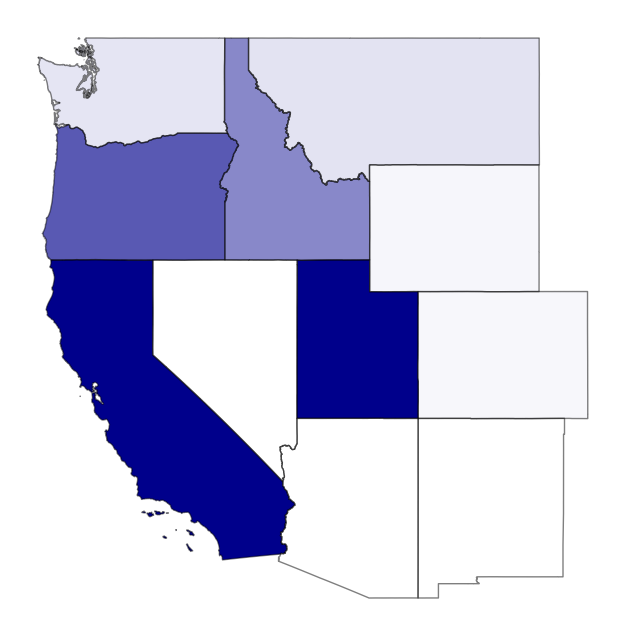

In [203]:
make_state_gw_maps('2070 CanESM MAR vs no adaptation')

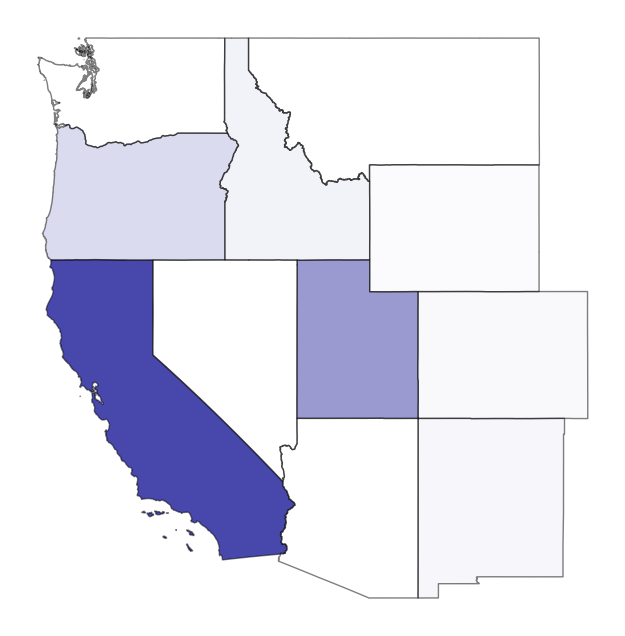

In [204]:
make_state_gw_maps('2070 CESM1BGC MAR vs no adaptation')

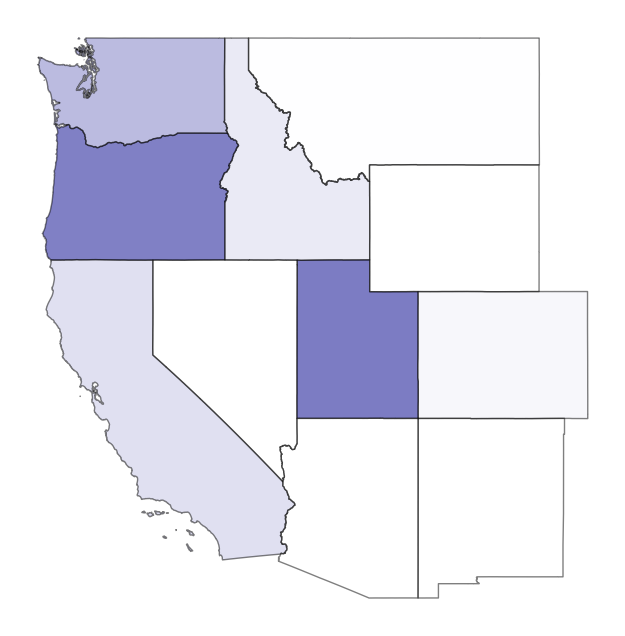

In [205]:
make_state_gw_maps('2070 CMCCCM MAR vs no adaptation')

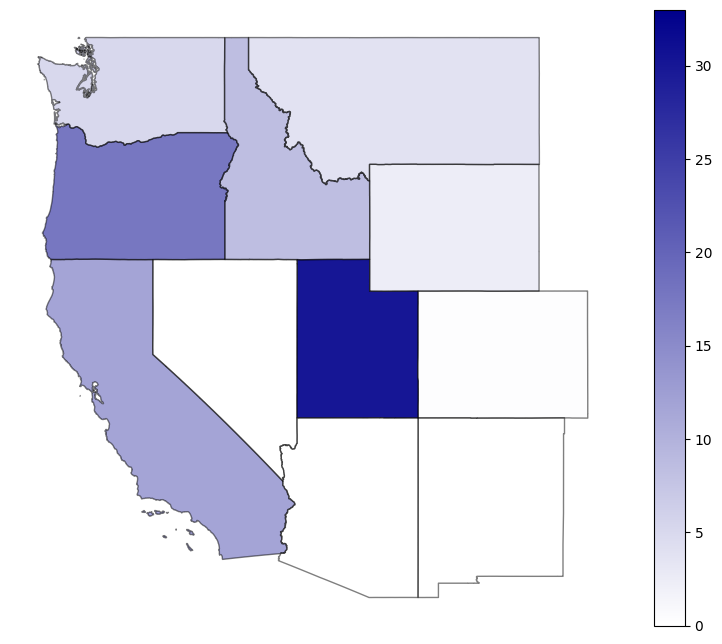

In [40]:
make_state_gw_maps('2060 CanESM MAR vs no adaptation')

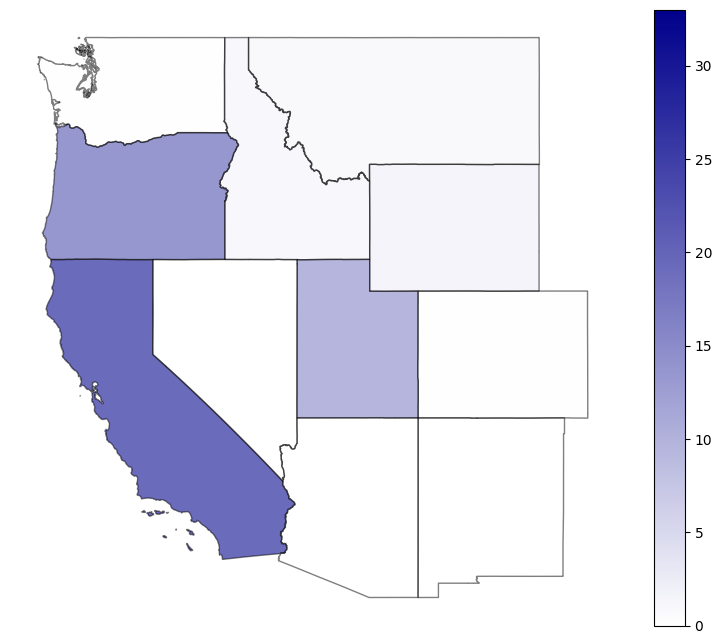

In [41]:
make_state_gw_maps('2060 CESM1BGC MAR vs no adaptation')

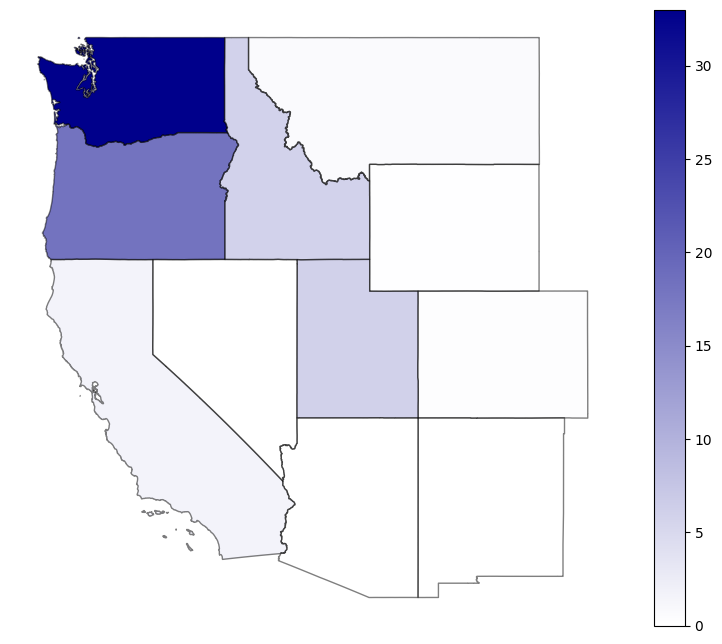

In [42]:
make_state_gw_maps('2060 CMCCCM MAR vs no adaptation')

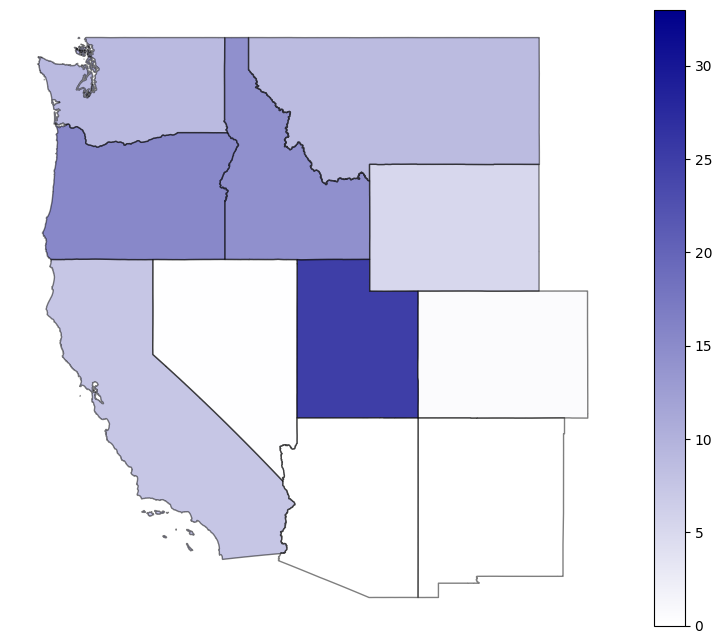

In [43]:
make_state_gw_maps('2050 CanESM MAR vs no adaptation')

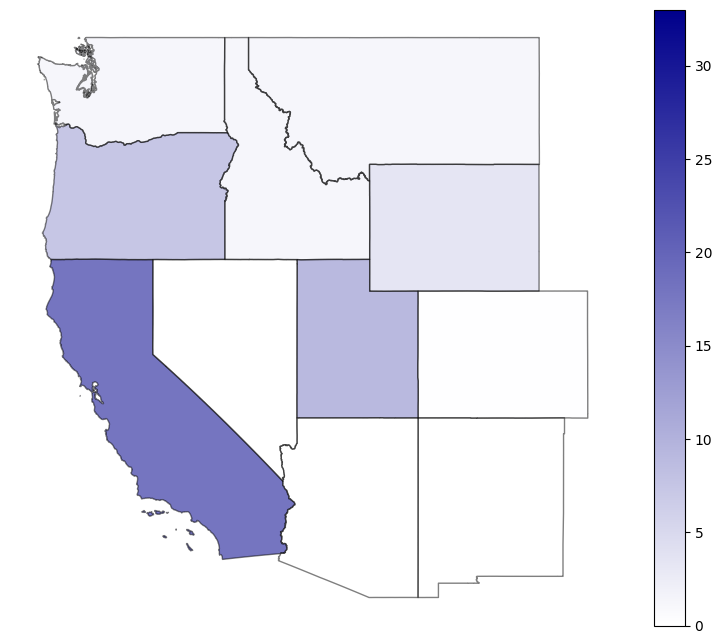

In [44]:
make_state_gw_maps('2050 CESM1BGC MAR vs no adaptation')

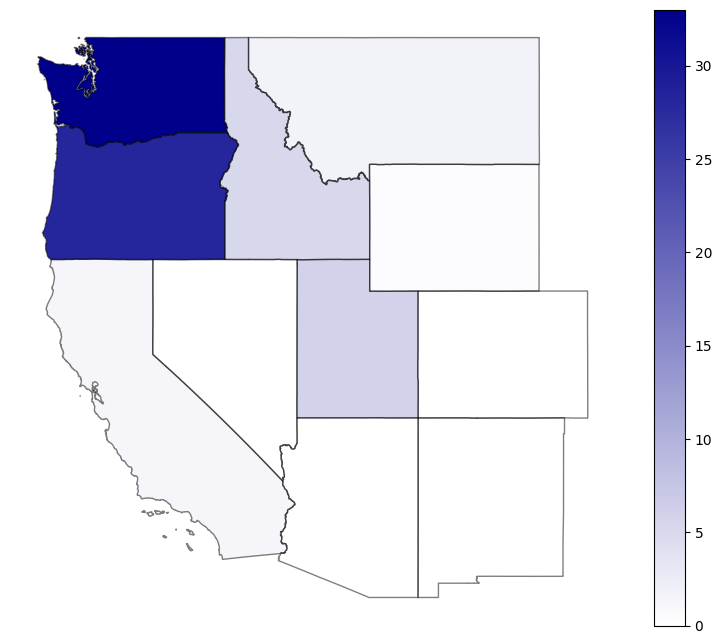

In [45]:
make_state_gw_maps('2050 CMCCCM MAR vs no adaptation')

Below is the code for making chloropleths for indoor water use and wastewater impacts

In [46]:
difference_dfs_name_list = [
    'dfCanESM_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_impacts_indoor_unmet_demand.csv',
    'dfCMCCCM_impacts_indoor_unmet_demand.csv',

    'dfCanESM_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_impacts_outdoor_unmet_demand.csv',

    'dfCanESM_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_impacts_ag_unmet_demand.csv',
    'dfCMCCCM_impacts_ag_unmet_demand.csv',

    'dfCanESM_impacts_supply_delivered_indoor.csv', 'dfCESM1BGC_impacts_supply_delivered_indoor.csv', 
    'dfCMCCCM_impacts_supply_delivered_indoor.csv',

    'dfCanESM_impacts_supply_delivered_outdoor.csv', 'dfCESM1BGC_impacts_supply_delivered_outdoor.csv',
    'dfCMCCCM_impacts_supply_delivered_outdoor.csv', 

    'dfCanESM_impacts_supply_delivered_ag.csv', 'dfCESM1BGC_impacts_supply_delivered_ag.csv',
    'dfCMCCCM_impacts_supply_delivered_ag.csv',

    'dfCanESM_impacts_coverage_indoor.csv', 'dfCESM1BGC_impacts_coverage_indoor.csv',
    'dfCMCCCM_impacts_coverage_indoor.csv', 

    'dfCanESM_impacts_coverage_outdoor.csv', 'dfCESM1BGC_impacts_coverage_outdoor.csv', 
    'dfCMCCCM_impacts_coverage_outdoor.csv',

    'dfCanESM_impacts_coverage_ag.csv', 'dfCESM1BGC_impacts_coverage_ag.csv',
    'dfCMCCCM_impacts_coverage_ag.csv',

    'dfCanESM_impacts_groundwater_storage.csv', 'dfCESM1BGC_impacts_groundwater_storage.csv', 
    'dfCMCCCM_impacts_groundwater_storage.csv',

    'dfCanESM_impacts_electric_demand.csv', 'dfCESM1BGC_impacts_electric_demand.csv', 
    'dfCMCCCM_impacts_electric_demand.csv', 

    'dfCanESM_impacts_hydropower_generation.csv', 'dfCESM1BGC_impacts_hydropower_generation.csv', 
    'dfCMCCCM_impacts_hydropower_generation.csv',

    'dfCanESM_ag_impacts_indoor_unmet_demand.csv', 'dfCanESM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_indoor_unmet_demand.csv', 'dfCanESM_in_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCanESM_ag_impacts_outdoor_unmet_demand.csv', 'dfCanESM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_outdoor_unmet_demand.csv', 'dfCanESM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCanESM_ag_impacts_ag_unmet_demand.csv', 'dfCanESM_ww_impacts_ag_unmet_demand.csv',
    'dfCanESM_out_impacts_ag_unmet_demand.csv', 'dfCanESM_in_impacts_ag_unmet_demand.csv', 
    'dfCanESM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCanESM_ag_impacts_groundwater_storage.csv', 'dfCanESM_ww_impacts_groundwater_storage.csv',
    'dfCanESM_out_impacts_groundwater_storage.csv', 'dfCanESM_in_impacts_groundwater_storage.csv',
    'dfCanESM_mar_impacts_groundwater_storage.csv',

    'dfCanESM_ag_impacts_electric_demand.csv', 'dfCanESM_ww_impacts_electric_demand.csv', 
    'dfCanESM_out_impacts_electric_demand.csv', 'dfCanESM_in_impacts_electric_demand.csv',
    'dfCanESM_mar_impacts_electric_demand.csv',

    'dfCanESM_ag_impacts_hydropower_generation.csv', 'dfCanESM_ww_impacts_hydropower_generation.csv', 
    'dfCanESM_out_impacts_hydropower_generation.csv', 'dfCanESM_in_impacts_hydropower_generation.csv',
    'dfCanESM_mar_impacts_hydropower_generation.csv',

    'dfCESM1BGC_ag_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCESM1BGC_ag_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCESM1BGC_ag_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_ag_unmet_demand.csv',
    'dfCESM1BGC_out_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_in_impacts_ag_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCESM1BGC_ag_impacts_groundwater_storage.csv', 'dfCESM1BGC_ww_impacts_groundwater_storage.csv',
    'dfCESM1BGC_out_impacts_groundwater_storage.csv', 'dfCESM1BGC_in_impacts_groundwater_storage.csv',
    'dfCESM1BGC_mar_impacts_groundwater_storage.csv',

    'dfCESM1BGC_ag_impacts_electric_demand.csv', 'dfCESM1BGC_ww_impacts_electric_demand.csv', 
    'dfCESM1BGC_out_impacts_electric_demand.csv', 'dfCESM1BGC_in_impacts_electric_demand.csv',
    'dfCESM1BGC_mar_impacts_electric_demand.csv',

    'dfCESM1BGC_ag_impacts_hydropower_generation.csv', 'dfCESM1BGC_ww_impacts_hydropower_generation.csv', 
    'dfCESM1BGC_out_impacts_hydropower_generation.csv', 'dfCESM1BGC_in_impacts_hydropower_generation.csv',
    'dfCESM1BGC_mar_impacts_hydropower_generation.csv',

    'dfCMCCCM_ag_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCMCCCM_ag_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCMCCCM_ag_impacts_ag_unmet_demand.csv', 'dfCMCCCM_ww_impacts_ag_unmet_demand.csv',
    'dfCMCCCM_out_impacts_ag_unmet_demand.csv', 'dfCMCCCM_in_impacts_ag_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCMCCCM_ag_impacts_groundwater_storage.csv', 'dfCMCCCM_ww_impacts_groundwater_storage.csv',
    'dfCMCCCM_out_impacts_groundwater_storage.csv', 'dfCMCCCM_in_impacts_groundwater_storage.csv',
    'dfCMCCCM_mar_impacts_groundwater_storage.csv',

    'dfCMCCCM_ag_impacts_electric_demand.csv', 'dfCMCCCM_ww_impacts_electric_demand.csv', 
    'dfCMCCCM_out_impacts_electric_demand.csv', 'dfCMCCCM_in_impacts_electric_demand.csv',
    'dfCMCCCM_mar_impacts_electric_demand.csv', 

    'dfCMCCCM_ag_impacts_hydropower_generation.csv', 'dfCMCCCM_ww_impacts_hydropower_generation.csv', 
    'dfCMCCCM_out_impacts_hydropower_generation.csv', 'dfCMCCCM_in_impacts_hydropower_generation.csv',
    'dfCMCCCM_mar_impacts_hydropower_generation.csv'
]

In [47]:
difference_dfs_RefLOCA_names = [
    'dfCanESM_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_impacts_indoor_unmet_demand.csv',
    'dfCMCCCM_impacts_indoor_unmet_demand.csv',

    'dfCanESM_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_impacts_outdoor_unmet_demand.csv',

    'dfCanESM_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_impacts_ag_unmet_demand.csv',
    'dfCMCCCM_impacts_ag_unmet_demand.csv',

    'dfCanESM_impacts_supply_delivered_indoor.csv', 'dfCESM1BGC_impacts_supply_delivered_indoor.csv', 
    'dfCMCCCM_impacts_supply_delivered_indoor.csv',

    'dfCanESM_impacts_supply_delivered_outdoor.csv', 'dfCESM1BGC_impacts_supply_delivered_outdoor.csv',
    'dfCMCCCM_impacts_supply_delivered_outdoor.csv', 

    'dfCanESM_impacts_supply_delivered_ag.csv', 'dfCESM1BGC_impacts_supply_delivered_ag.csv',
    'dfCMCCCM_impacts_supply_delivered_ag.csv',

    'dfCanESM_impacts_coverage_indoor.csv', 'dfCESM1BGC_impacts_coverage_indoor.csv',
    'dfCMCCCM_impacts_coverage_indoor.csv', 

    'dfCanESM_impacts_coverage_outdoor.csv', 'dfCESM1BGC_impacts_coverage_outdoor.csv', 
    'dfCMCCCM_impacts_coverage_outdoor.csv',

    'dfCanESM_impacts_coverage_ag.csv', 'dfCESM1BGC_impacts_coverage_ag.csv',
    'dfCMCCCM_impacts_coverage_ag.csv',

    'dfCanESM_impacts_groundwater_storage.csv', 'dfCESM1BGC_impacts_groundwater_storage.csv', 
    'dfCMCCCM_impacts_groundwater_storage.csv',

    'dfCanESM_impacts_electric_demand.csv', 'dfCESM1BGC_impacts_electric_demand.csv', 
    'dfCMCCCM_impacts_electric_demand.csv', 

    'dfCanESM_impacts_hydropower_generation.csv', 'dfCESM1BGC_impacts_hydropower_generation.csv', 
    'dfCMCCCM_impacts_hydropower_generation.csv']

difference_dfs_CanESM_names = [
    'dfCanESM_ag_impacts_indoor_unmet_demand.csv', 'dfCanESM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_indoor_unmet_demand.csv', 'dfCanESM_in_impacts_indoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCanESM_ag_impacts_outdoor_unmet_demand.csv', 'dfCanESM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_out_impacts_outdoor_unmet_demand.csv', 'dfCanESM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCanESM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCanESM_ag_impacts_ag_unmet_demand.csv', 'dfCanESM_ww_impacts_ag_unmet_demand.csv',
    'dfCanESM_out_impacts_ag_unmet_demand.csv', 'dfCanESM_in_impacts_ag_unmet_demand.csv', 
    'dfCanESM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCanESM_ag_impacts_groundwater_storage.csv', 'dfCanESM_ww_impacts_groundwater_storage.csv',
    'dfCanESM_out_impacts_groundwater_storage.csv', 'dfCanESM_in_impacts_groundwater_storage.csv',
    'dfCanESM_mar_impacts_groundwater_storage.csv',

    'dfCanESM_ag_impacts_electric_demand.csv', 'dfCanESM_ww_impacts_electric_demand.csv', 
    'dfCanESM_out_impacts_electric_demand.csv', 'dfCanESM_in_impacts_electric_demand.csv',
    'dfCanESM_mar_impacts_electric_demand.csv',

    'dfCanESM_ag_impacts_hydropower_generation.csv', 'dfCanESM_ww_impacts_hydropower_generation.csv', 
    'dfCanESM_out_impacts_hydropower_generation.csv', 'dfCanESM_in_impacts_hydropower_generation.csv',
    'dfCanESM_mar_impacts_hydropower_generation.csv']

difference_dfs_CESM1BGC_names = [
    'dfCESM1BGC_ag_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_indoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_indoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCESM1BGC_ag_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_out_impacts_outdoor_unmet_demand.csv', 'dfCESM1BGC_in_impacts_outdoor_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCESM1BGC_ag_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_ww_impacts_ag_unmet_demand.csv',
    'dfCESM1BGC_out_impacts_ag_unmet_demand.csv', 'dfCESM1BGC_in_impacts_ag_unmet_demand.csv', 
    'dfCESM1BGC_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCESM1BGC_ag_impacts_groundwater_storage.csv', 'dfCESM1BGC_ww_impacts_groundwater_storage.csv',
    'dfCESM1BGC_out_impacts_groundwater_storage.csv', 'dfCESM1BGC_in_impacts_groundwater_storage.csv',
    'dfCESM1BGC_mar_impacts_groundwater_storage.csv',

    'dfCESM1BGC_ag_impacts_electric_demand.csv', 'dfCESM1BGC_ww_impacts_electric_demand.csv', 
    'dfCESM1BGC_out_impacts_electric_demand.csv', 'dfCESM1BGC_in_impacts_electric_demand.csv',
    'dfCESM1BGC_mar_impacts_electric_demand.csv',

    'dfCESM1BGC_ag_impacts_hydropower_generation.csv', 'dfCESM1BGC_ww_impacts_hydropower_generation.csv', 
    'dfCESM1BGC_out_impacts_hydropower_generation.csv', 'dfCESM1BGC_in_impacts_hydropower_generation.csv',
    'dfCESM1BGC_mar_impacts_hydropower_generation.csv']

difference_dfs_CMCCCM_names = [
    'dfCMCCCM_ag_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_indoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_indoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_indoor_unmet_demand.csv',
    
    'dfCMCCCM_ag_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_ww_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_out_impacts_outdoor_unmet_demand.csv', 'dfCMCCCM_in_impacts_outdoor_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_outdoor_unmet_demand.csv', 

    'dfCMCCCM_ag_impacts_ag_unmet_demand.csv', 'dfCMCCCM_ww_impacts_ag_unmet_demand.csv',
    'dfCMCCCM_out_impacts_ag_unmet_demand.csv', 'dfCMCCCM_in_impacts_ag_unmet_demand.csv', 
    'dfCMCCCM_mar_impacts_ag_unmet_demand.csv', 
    
    'dfCMCCCM_ag_impacts_groundwater_storage.csv', 'dfCMCCCM_ww_impacts_groundwater_storage.csv',
    'dfCMCCCM_out_impacts_groundwater_storage.csv', 'dfCMCCCM_in_impacts_groundwater_storage.csv',
    'dfCMCCCM_mar_impacts_groundwater_storage.csv',

    'dfCMCCCM_ag_impacts_electric_demand.csv', 'dfCMCCCM_ww_impacts_electric_demand.csv', 
    'dfCMCCCM_out_impacts_electric_demand.csv', 'dfCMCCCM_in_impacts_electric_demand.csv',
    'dfCMCCCM_mar_impacts_electric_demand.csv', 

    'dfCMCCCM_ag_impacts_hydropower_generation.csv', 'dfCMCCCM_ww_impacts_hydropower_generation.csv', 
    'dfCMCCCM_out_impacts_hydropower_generation.csv', 'dfCMCCCM_in_impacts_hydropower_generation.csv',
    'dfCMCCCM_mar_impacts_hydropower_generation.csv',
]

In [48]:
CanESM_csv_names = ['CanESM.csv', 'CanESM_ag.csv', 'CanESM_ww.csv', 'CanESM_out.csv', 'CanESM_in.csv', 'CanESM_mar.csv']
CESM1BGC_csv_names = ['CESM1BGC.csv', 'CESM1BGC_ag.csv', 'CESM1BGC_ww.csv', 'CESM1BGC_out.csv', 'CESM1BGC_in.csv', 'CESM1BGC_mar.csv']  
CMCCCM_csv_names = ['CMCCCM.csv', 'CMCCCM_ag.csv', 'CMCCCM_ww.csv', 'CMCCCM_out.csv', 'CMCCCM_in.csv', 'CMCCCM_mar.csv']  

In [49]:
#create dfs from the .csvs
#THIS WILL NEED TO BE TESTED... need dfs to retain their names
def create_dfs_from_csvs (dfs_name_list):
    for name in dfs_name_list:
        df_name = name.replace('.csv', '')
        if not df_name.startswith('df'):
            df_name = 'df'+ df_name
        globals()[df_name] = pd.read_csv(name)


In [50]:
create_dfs_from_csvs(difference_dfs_name_list)
create_dfs_from_csvs(CanESM_csv_names)
create_dfs_from_csvs(CESM1BGC_csv_names)
create_dfs_from_csvs(CMCCCM_csv_names)
create_dfs_from_csvs(['RefLOCA.csv'])

In [51]:
CanESM_dfs = [dfCanESM, dfCanESM_ag, dfCanESM_ww, dfCanESM_out, dfCanESM_in, dfCanESM_mar]
CESM1BGC_dfs = [dfCESM1BGC, dfCESM1BGC_ag, dfCESM1BGC_ww, dfCESM1BGC_out, dfCESM1BGC_in, dfCESM1BGC_mar]
CMCCCM_dfs = [dfCMCCCM, dfCMCCCM_ag, dfCMCCCM_ww, dfCMCCCM_out, dfCMCCCM_in, dfCMCCCM_mar]
CanESM_labels = ['CanESM', 'CanESM_ag', 'CanESM_ww', 'CanESM_out', 'CanESM_in', 'CanESM_mar']
CESM1BGC_labels = ['CESM1BGC', 'CESM1BGC_ag', 'CESM1BGC_ww', 'CESM1BGC_out', 'CESM1BGC_in', 'CESM1BGC_mar']  
CMCCCM_labels = ['CMCCCM', 'CMCCCM_ag', 'CMCCCM_ww', 'CMCCCM_out', 'CMCCCM_in', 'CMCCCM_mar'] 

In [52]:
#create a list of the dfs, so we can read them in from the csvs in loops
difference_dfs_list = [
    #all of the refloca vs. climate scenarios
    dfCanESM_impacts_indoor_unmet_demand, dfCESM1BGC_impacts_indoor_unmet_demand,
    dfCMCCCM_impacts_indoor_unmet_demand,

    dfCanESM_impacts_outdoor_unmet_demand, dfCESM1BGC_impacts_outdoor_unmet_demand, 
    dfCMCCCM_impacts_outdoor_unmet_demand,

    dfCanESM_impacts_ag_unmet_demand, dfCESM1BGC_impacts_ag_unmet_demand,
    dfCMCCCM_impacts_ag_unmet_demand,

    dfCanESM_impacts_supply_delivered_indoor, dfCESM1BGC_impacts_supply_delivered_indoor, 
    dfCMCCCM_impacts_supply_delivered_indoor,

    dfCanESM_impacts_supply_delivered_outdoor, dfCESM1BGC_impacts_supply_delivered_outdoor,
    dfCMCCCM_impacts_supply_delivered_outdoor, 

    dfCanESM_impacts_supply_delivered_ag, dfCESM1BGC_impacts_supply_delivered_ag,
    dfCMCCCM_impacts_supply_delivered_ag,

    dfCanESM_impacts_coverage_indoor, dfCESM1BGC_impacts_coverage_indoor,
    dfCMCCCM_impacts_coverage_indoor, 

    dfCanESM_impacts_coverage_outdoor, dfCESM1BGC_impacts_coverage_outdoor, 
    dfCMCCCM_impacts_coverage_outdoor,

    dfCanESM_impacts_coverage_ag, dfCESM1BGC_impacts_coverage_ag,
    dfCMCCCM_impacts_coverage_ag,

    dfCanESM_impacts_groundwater_storage, dfCESM1BGC_impacts_groundwater_storage, 
    dfCMCCCM_impacts_groundwater_storage,

    dfCanESM_impacts_electric_demand, dfCESM1BGC_impacts_electric_demand, 
    dfCMCCCM_impacts_electric_demand, 

    dfCanESM_impacts_hydropower_generation, dfCESM1BGC_impacts_hydropower_generation, 
    dfCMCCCM_impacts_hydropower_generation,

    #all of the CanESM scenarios vs. the CanESM + adaptation scenarios
    dfCanESM_ag_impacts_indoor_unmet_demand, dfCanESM_ww_impacts_indoor_unmet_demand, 
    dfCanESM_out_impacts_indoor_unmet_demand, dfCanESM_in_impacts_indoor_unmet_demand, 
    dfCanESM_mar_impacts_indoor_unmet_demand,
    
    dfCanESM_ag_impacts_outdoor_unmet_demand, dfCanESM_ww_impacts_outdoor_unmet_demand, 
    dfCanESM_out_impacts_outdoor_unmet_demand, dfCanESM_in_impacts_outdoor_unmet_demand, 
    dfCanESM_mar_impacts_outdoor_unmet_demand, 

    dfCanESM_ag_impacts_ag_unmet_demand, dfCanESM_ww_impacts_ag_unmet_demand,
    dfCanESM_out_impacts_ag_unmet_demand, dfCanESM_in_impacts_ag_unmet_demand, 
    dfCanESM_mar_impacts_ag_unmet_demand, 
    
    dfCanESM_ag_impacts_groundwater_storage, dfCanESM_ww_impacts_groundwater_storage,
    dfCanESM_out_impacts_groundwater_storage, dfCanESM_in_impacts_groundwater_storage,
    dfCanESM_mar_impacts_groundwater_storage,

    dfCanESM_ag_impacts_electric_demand, dfCanESM_ww_impacts_electric_demand, 
    dfCanESM_out_impacts_electric_demand, dfCanESM_in_impacts_electric_demand,
    dfCanESM_mar_impacts_electric_demand,

    dfCanESM_ag_impacts_hydropower_generation, dfCanESM_ww_impacts_hydropower_generation, 
    dfCanESM_out_impacts_hydropower_generation, dfCanESM_in_impacts_hydropower_generation,
    dfCanESM_mar_impacts_hydropower_generation,

    #all of the CESM1BGC scenarios vs. the CESM1BGC + adaptation scenarios
    dfCESM1BGC_ag_impacts_indoor_unmet_demand, dfCESM1BGC_ww_impacts_indoor_unmet_demand, 
    dfCESM1BGC_out_impacts_indoor_unmet_demand, dfCESM1BGC_in_impacts_indoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_indoor_unmet_demand,
    
    dfCESM1BGC_ag_impacts_outdoor_unmet_demand, dfCESM1BGC_ww_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_out_impacts_outdoor_unmet_demand, dfCESM1BGC_in_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_outdoor_unmet_demand, 

    dfCESM1BGC_ag_impacts_ag_unmet_demand, dfCESM1BGC_ww_impacts_ag_unmet_demand,
    dfCESM1BGC_out_impacts_ag_unmet_demand, dfCESM1BGC_in_impacts_ag_unmet_demand, 
    dfCESM1BGC_mar_impacts_ag_unmet_demand, 
    
    dfCESM1BGC_ag_impacts_groundwater_storage, dfCESM1BGC_ww_impacts_groundwater_storage,
    dfCESM1BGC_out_impacts_groundwater_storage, dfCESM1BGC_in_impacts_groundwater_storage,
    dfCESM1BGC_mar_impacts_groundwater_storage,

    dfCESM1BGC_ag_impacts_electric_demand, dfCESM1BGC_ww_impacts_electric_demand, 
    dfCESM1BGC_out_impacts_electric_demand, dfCESM1BGC_in_impacts_electric_demand,
    dfCESM1BGC_mar_impacts_electric_demand,

    dfCESM1BGC_ag_impacts_hydropower_generation, dfCESM1BGC_ww_impacts_hydropower_generation, 
    dfCESM1BGC_out_impacts_hydropower_generation, dfCESM1BGC_in_impacts_hydropower_generation,
    dfCESM1BGC_mar_impacts_hydropower_generation,

    #all of the CMCCCM scenarios vs. the CMCCCM + adaptation scenarios
    dfCMCCCM_ag_impacts_indoor_unmet_demand, dfCMCCCM_ww_impacts_indoor_unmet_demand, 
    dfCMCCCM_out_impacts_indoor_unmet_demand, dfCMCCCM_in_impacts_indoor_unmet_demand, 
    dfCMCCCM_mar_impacts_indoor_unmet_demand,
    
    dfCMCCCM_ag_impacts_outdoor_unmet_demand, dfCMCCCM_ww_impacts_outdoor_unmet_demand, 
    dfCMCCCM_out_impacts_outdoor_unmet_demand, dfCMCCCM_in_impacts_outdoor_unmet_demand, 
    dfCMCCCM_mar_impacts_outdoor_unmet_demand, 

    dfCMCCCM_ag_impacts_ag_unmet_demand, dfCMCCCM_ww_impacts_ag_unmet_demand,
    dfCMCCCM_out_impacts_ag_unmet_demand, dfCMCCCM_in_impacts_ag_unmet_demand, 
    dfCMCCCM_mar_impacts_ag_unmet_demand, 
    
    dfCMCCCM_ag_impacts_groundwater_storage, dfCMCCCM_ww_impacts_groundwater_storage,
    dfCMCCCM_out_impacts_groundwater_storage, dfCMCCCM_in_impacts_groundwater_storage,
    dfCMCCCM_mar_impacts_groundwater_storage,

    dfCMCCCM_ag_impacts_electric_demand, dfCMCCCM_ww_impacts_electric_demand, 
    dfCMCCCM_out_impacts_electric_demand, dfCMCCCM_in_impacts_electric_demand,
    dfCMCCCM_mar_impacts_electric_demand, 

    dfCMCCCM_ag_impacts_hydropower_generation, dfCMCCCM_ww_impacts_hydropower_generation, 
    dfCMCCCM_out_impacts_hydropower_generation, dfCMCCCM_in_impacts_hydropower_generation,
    dfCMCCCM_mar_impacts_hydropower_generation,
]

In [53]:
#create a list of the dfs, so we can read them in from the csvs in loops
difference_dfs_RefLOCA_list = [
    #all of the refloca vs. climate scenarios
    dfCanESM_impacts_indoor_unmet_demand, dfCESM1BGC_impacts_indoor_unmet_demand,
    dfCMCCCM_impacts_indoor_unmet_demand,

    dfCanESM_impacts_outdoor_unmet_demand, dfCESM1BGC_impacts_outdoor_unmet_demand, 
    dfCMCCCM_impacts_outdoor_unmet_demand,

    dfCanESM_impacts_ag_unmet_demand, dfCESM1BGC_impacts_ag_unmet_demand,
    dfCMCCCM_impacts_ag_unmet_demand,

    dfCanESM_impacts_supply_delivered_indoor, dfCESM1BGC_impacts_supply_delivered_indoor, 
    dfCMCCCM_impacts_supply_delivered_indoor,

    dfCanESM_impacts_supply_delivered_outdoor, dfCESM1BGC_impacts_supply_delivered_outdoor,
    dfCMCCCM_impacts_supply_delivered_outdoor, 

    dfCanESM_impacts_supply_delivered_ag, dfCESM1BGC_impacts_supply_delivered_ag,
    dfCMCCCM_impacts_supply_delivered_ag,

    dfCanESM_impacts_coverage_indoor, dfCESM1BGC_impacts_coverage_indoor,
    dfCMCCCM_impacts_coverage_indoor, 

    dfCanESM_impacts_coverage_outdoor, dfCESM1BGC_impacts_coverage_outdoor, 
    dfCMCCCM_impacts_coverage_outdoor,

    dfCanESM_impacts_coverage_ag, dfCESM1BGC_impacts_coverage_ag,
    dfCMCCCM_impacts_coverage_ag,

    dfCanESM_impacts_groundwater_storage, dfCESM1BGC_impacts_groundwater_storage, 
    dfCMCCCM_impacts_groundwater_storage,

    dfCanESM_impacts_electric_demand, dfCESM1BGC_impacts_electric_demand, 
    dfCMCCCM_impacts_electric_demand, 

    dfCanESM_impacts_hydropower_generation, dfCESM1BGC_impacts_hydropower_generation, 
    dfCMCCCM_impacts_hydropower_generation]

difference_dfs_CanESM_list = [
    #all of the CanESM scenarios vs. the CanESM + adaptation scenarios
    dfCanESM_ag_impacts_indoor_unmet_demand, dfCanESM_ww_impacts_indoor_unmet_demand, 
    dfCanESM_out_impacts_indoor_unmet_demand, dfCanESM_in_impacts_indoor_unmet_demand, 
    dfCanESM_mar_impacts_indoor_unmet_demand,
    
    dfCanESM_ag_impacts_outdoor_unmet_demand, dfCanESM_ww_impacts_outdoor_unmet_demand, 
    dfCanESM_out_impacts_outdoor_unmet_demand, dfCanESM_in_impacts_outdoor_unmet_demand, 
    dfCanESM_mar_impacts_outdoor_unmet_demand, 

    dfCanESM_ag_impacts_ag_unmet_demand, dfCanESM_ww_impacts_ag_unmet_demand,
    dfCanESM_out_impacts_ag_unmet_demand, dfCanESM_in_impacts_ag_unmet_demand, 
    dfCanESM_mar_impacts_ag_unmet_demand, 
    
    dfCanESM_ag_impacts_groundwater_storage, dfCanESM_ww_impacts_groundwater_storage,
    dfCanESM_out_impacts_groundwater_storage, dfCanESM_in_impacts_groundwater_storage,
    dfCanESM_mar_impacts_groundwater_storage,

    dfCanESM_ag_impacts_electric_demand, dfCanESM_ww_impacts_electric_demand, 
    dfCanESM_out_impacts_electric_demand, dfCanESM_in_impacts_electric_demand,
    dfCanESM_mar_impacts_electric_demand,

    dfCanESM_ag_impacts_hydropower_generation, dfCanESM_ww_impacts_hydropower_generation, 
    dfCanESM_out_impacts_hydropower_generation, dfCanESM_in_impacts_hydropower_generation,
    dfCanESM_mar_impacts_hydropower_generation]

difference_dfs_CESM1BGC_list = [
    #all of the CESM1BGC scenarios vs. the CESM1BGC + adaptation scenarios
    dfCESM1BGC_ag_impacts_indoor_unmet_demand, dfCESM1BGC_ww_impacts_indoor_unmet_demand, 
    dfCESM1BGC_out_impacts_indoor_unmet_demand, dfCESM1BGC_in_impacts_indoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_indoor_unmet_demand,
    
    dfCESM1BGC_ag_impacts_outdoor_unmet_demand, dfCESM1BGC_ww_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_out_impacts_outdoor_unmet_demand, dfCESM1BGC_in_impacts_outdoor_unmet_demand, 
    dfCESM1BGC_mar_impacts_outdoor_unmet_demand, 

    dfCESM1BGC_ag_impacts_ag_unmet_demand, dfCESM1BGC_ww_impacts_ag_unmet_demand,
    dfCESM1BGC_out_impacts_ag_unmet_demand, dfCESM1BGC_in_impacts_ag_unmet_demand, 
    dfCESM1BGC_mar_impacts_ag_unmet_demand, 
    
    dfCESM1BGC_ag_impacts_groundwater_storage, dfCESM1BGC_ww_impacts_groundwater_storage,
    dfCESM1BGC_out_impacts_groundwater_storage, dfCESM1BGC_in_impacts_groundwater_storage,
    dfCESM1BGC_mar_impacts_groundwater_storage,

    dfCESM1BGC_ag_impacts_electric_demand, dfCESM1BGC_ww_impacts_electric_demand, 
    dfCESM1BGC_out_impacts_electric_demand, dfCESM1BGC_in_impacts_electric_demand,
    dfCESM1BGC_mar_impacts_electric_demand,

    dfCESM1BGC_ag_impacts_hydropower_generation, dfCESM1BGC_ww_impacts_hydropower_generation, 
    dfCESM1BGC_out_impacts_hydropower_generation, dfCESM1BGC_in_impacts_hydropower_generation,
    dfCESM1BGC_mar_impacts_hydropower_generation]

difference_dfs_CMCCCM_list = [
    #all of the CMCCCM scenarios vs. the CMCCCM + adaptation scenarios
    dfCMCCCM_ag_impacts_indoor_unmet_demand, dfCMCCCM_ww_impacts_indoor_unmet_demand, 
    dfCMCCCM_out_impacts_indoor_unmet_demand, dfCMCCCM_in_impacts_indoor_unmet_demand, 
    dfCMCCCM_mar_impacts_indoor_unmet_demand,
    
    dfCMCCCM_ag_impacts_outdoor_unmet_demand, dfCMCCCM_ww_impacts_outdoor_unmet_demand, 
    dfCMCCCM_out_impacts_outdoor_unmet_demand, dfCMCCCM_in_impacts_outdoor_unmet_demand, 
    dfCMCCCM_mar_impacts_outdoor_unmet_demand, 

    dfCMCCCM_ag_impacts_ag_unmet_demand, dfCMCCCM_ww_impacts_ag_unmet_demand,
    dfCMCCCM_out_impacts_ag_unmet_demand, dfCMCCCM_in_impacts_ag_unmet_demand, 
    dfCMCCCM_mar_impacts_ag_unmet_demand, 
    
    dfCMCCCM_ag_impacts_groundwater_storage, dfCMCCCM_ww_impacts_groundwater_storage,
    dfCMCCCM_out_impacts_groundwater_storage, dfCMCCCM_in_impacts_groundwater_storage,
    dfCMCCCM_mar_impacts_groundwater_storage,

    dfCMCCCM_ag_impacts_electric_demand, dfCMCCCM_ww_impacts_electric_demand, 
    dfCMCCCM_out_impacts_electric_demand, dfCMCCCM_in_impacts_electric_demand,
    dfCMCCCM_mar_impacts_electric_demand, 

    dfCMCCCM_ag_impacts_hydropower_generation, dfCMCCCM_ww_impacts_hydropower_generation, 
    dfCMCCCM_out_impacts_hydropower_generation, dfCMCCCM_in_impacts_hydropower_generation,
    dfCMCCCM_mar_impacts_hydropower_generation,
]

In [54]:
def fix_columns (df_list):
    for df in df_list:
        #drop the Unnamed: 0 column
        df.drop(["Unnamed: 0"], axis = 1, inplace=True)
        #change the date column to datetime type
        df['Date'] = pd.to_datetime(df['Date'])

In [55]:
def add_year_and_month_columns (df_list):
    for df in df_list:
        df['Month'] = df['Date'].dt.month_name().tolist()
        df['Year'] = df['Date'].dt.year

In [56]:
fix_columns(difference_dfs_list)
fix_columns(CanESM_dfs)
fix_columns(CESM1BGC_dfs)
fix_columns(CMCCCM_dfs)
fix_columns([dfRefLOCA])

In [57]:
add_year_and_month_columns(difference_dfs_list)

In [58]:
CanESM_csv_names = ['CanESM.csv', 'CanESM_ag.csv', 'CanESM_ww.csv', 'CanESM_out.csv', 'CanESM_in.csv', 'CanESM_mar.csv']
CESM1BGC_csv_names = ['CESM1BGC.csv', 'CESM1BGC_ag.csv', 'CESM1BGC_ww.csv', 'CESM1BGC_out.csv', 'CESM1BGC_in.csv', 'CESM1BGC_mar.csv']  
CMCCCM_csv_names = ['CMCCCM.csv', 'CMCCCM_ag.csv', 'CMCCCM_ww.csv', 'CMCCCM_out.csv', 'CMCCCM_in.csv', 'CMCCCM_mar.csv']  

In [59]:
#create dfs from the .csvs
#THIS WILL NEED TO BE TESTED... need dfs to retain their names
def create_dfs_from_csvs (dfs_name_list):
    for name in dfs_name_list:
        df_name = name.replace('.csv', '')
        if not df_name.startswith('df'):
            df_name = 'df'+ df_name
        globals()[df_name] = pd.read_csv(name)


In [60]:
create_dfs_from_csvs(CanESM_csv_names)
create_dfs_from_csvs(CESM1BGC_csv_names)
create_dfs_from_csvs(CMCCCM_csv_names)
create_dfs_from_csvs(['RefLOCA.csv'])

In [61]:
dfCanESM2020 = dfCanESM[(dfCanESM['Year'] >= 2020)]
dfCanESM2020_in = dfCanESM_in[(dfCanESM_in['Year'] >= 2020)]
dfCanESM2020_out = dfCanESM_out[(dfCanESM_out['Year'] >= 2020)]
dfCanESM2020_ag = dfCanESM_ag[(dfCanESM_ag['Year'] >= 2020)]
dfCanESM2020_ww = dfCanESM_ww[(dfCanESM_ag['Year'] >= 2020)]
dfCanESM2020_mar = dfCanESM_mar[(dfCanESM_ag['Year'] >= 2020)]

dfCESM1BGC2020 = dfCESM1BGC[(dfCESM1BGC['Year'] >= 2020)]
dfCESM1BGC2020_in = dfCESM1BGC_in[(dfCESM1BGC_in['Year'] >= 2020)]
dfCESM1BGC2020_out = dfCESM1BGC_out[(dfCESM1BGC_out['Year'] >= 2020)]
dfCESM1BGC2020_ag = dfCESM1BGC_ag[(dfCESM1BGC_ag['Year'] >= 2020)]
dfCESM1BGC2020_ww = dfCESM1BGC_ww[(dfCESM1BGC_ag['Year'] >= 2020)]
dfCESM1BGC2020_mar = dfCESM1BGC_mar[(dfCESM1BGC_ag['Year'] >= 2020)]

dfCMCCCM2020 = dfCMCCCM[(dfCMCCCM['Year'] >= 2020)]
dfCMCCCM2020_in = dfCMCCCM_in[(dfCMCCCM_in['Year'] >= 2020)]
dfCMCCCM2020_out = dfCMCCCM_out[(dfCMCCCM_out['Year'] >= 2020)]
dfCMCCCM2020_ag = dfCMCCCM_ag[(dfCMCCCM_ag['Year'] >= 2020)]
dfCMCCCM2020_ww = dfCMCCCM_ww[(dfCMCCCM_ag['Year'] >= 2020)]
dfCMCCCM2020_mar = dfCMCCCM_mar[(dfCMCCCM_ag['Year'] >= 2020)]

dfRefLOCA2020 = dfRefLOCA[(dfRefLOCA['Year'] >= 2020)]

In [62]:
def sum_state_unmet_demand (df, column_list):
# total=0
    column_sums=[]
    state_abbreviations = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
    state_names = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'New Mexico', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming']
    
    for column in column_list:
        if column in df.columns:
            #sum the column and add it to a list of summed columns
            for abbr, name in zip(state_abbreviations, state_names):
                check_string = '_IN_' + abbr
                if check_string in column:
                    column_sums.append([name, df[column].sum()])
                    # #this is being tracked to double check the totals are correct
                    # total = total + dfCESM1BGC2020[column].sum()

    #this turns the list above into a list summed by state and returns it as a dictionary
    state_sums = {}
    for item in column_sums:
        state = item[0]
        value = item[1]
        if state in state_sums:
            state_sums[state] += value
        else:
            state_sums[state] = value

    return state_sums

# print(total)
# print(column_sums)
# print(state_sums)

In [63]:
def add_adaptation_impact(gdf, impact_dict, column_name):

    gdf[column_name] = gdf['NAME'].map(impact_dict)
    return


In [64]:
indoor_unmet_demand_columns = [col for col in dfRefLOCA2020.columns if 'Unmet_Dem_IN_' in col]

In [65]:
unmet_indoor_df_list = [dfCanESM2020, dfCESM1BGC2020, dfCMCCCM2020,
                        dfCanESM2020_in, dfCESM1BGC2020_in, dfCMCCCM2020_in,
                        dfCanESM2020_ww, dfCESM1BGC2020_ww, dfCMCCCM2020_ww]

impact_column_name = ['CanESM unmet indoor', 'CESM1BGC unmet indoor', 'CMCCCM unmet indoor', 
                      'CanESM in unmet indoor', 'CESM1BGC in unmet indoor', 'CMCCCM in unmet indoor',
                      'CanESM ww unmet indoor', 'CESM1BGC ww unmet indoor', 'CMCCCM ww unmet indoor']

#for each df and corresponding column name in the lists above
for df, column_name in zip(unmet_indoor_df_list, impact_column_name):
    #for the df, calculate the unmet indoor demand in each state
    state_totals = sum_state_unmet_demand(df, indoor_unmet_demand_columns)
    #add a corresponding column to the western_states geodataframe
    add_adaptation_impact(western_states, state_totals, column_name)

western_states

C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is tryin

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2050 CMCCCM MAR vs no adaptation,CanESM unmet indoor,CESM1BGC unmet indoor,CMCCCM unmet indoor,CanESM in unmet indoor,CESM1BGC in unmet indoor,CMCCCM in unmet indoor,CanESM ww unmet indoor,CESM1BGC ww unmet indoor,CMCCCM ww unmet indoor
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",...,5.113633,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.57039 48.53785, -122.5686...",...,61.037480,1.901417e+05,6.959001e+05,3.201304e+04,1.372780e+04,4.767459e+05,9.655020e+02,0.000000e+00,4.751140e+05,8.111000e-08
12,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995...",...,0.109829,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",...,1.345392,2.285301e+07,2.600377e+07,3.583818e+07,1.255289e+07,1.326900e+07,1.936477e+07,4.859525e+06,3.629698e+06,8.056485e+06
21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,-0.017527,0.000000e+00,4.010000e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
22,49,01455989,0400000US49,49,UT,Utah,00,212886221680,6998824394,"POLYGON ((-114.05296 37.59278, -114.05247 37.6...",...,5.816513,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
24,56,01779807,0400000US56,56,WY,Wyoming,00,251458544898,1867670745,"POLYGON ((-111.05456 45.00096, -111.04507 45.0...",...,0.393080,8.217604e+06,9.168807e+06,1.017439e+07,7.796883e+06,8.658979e+06,9.643065e+06,7.108239e+06,7.635408e+06,8.545008e+06
28,32,01779793,0400000US32,32,NV,Nevada,00,284329506470,2047206072,"POLYGON ((-120.00574 39.22866, -120.00559 39.2...",...,0.034795,1.677666e+06,2.305266e+06,3.056975e+06,1.444837e+06,1.920510e+06,2.646178e+06,2.443061e+05,4.412967e+04,3.170163e+05
31,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,"POLYGON ((-116.04914 48.50205, -116.04913 48.5...",...,1.772690,3.999049e+06,4.439669e+06,4.085868e+06,3.693979e+06,4.095731e+06,3.776140e+06,4.048527e+06,4.481377e+06,4.143601e+06
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",...,-0.007195,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [196]:
def make_state_indoor_maps (column_name):
    
    fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis
    
    cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#5ab4ac', '#d8b365']) 
    norm = colors.Normalize(vmin=0, vmax=15000000)
    
    western_states.plot(column=column_name, cmap=cmap, norm=norm, ax=plt.gca(), legend=True,
                        legend_kwds={'label': 'Million acre-feet of unmet indoor demand',
                                   'format': lambda x, *args: '{:.0f} MAF'.format(x / 1000000) if x != 0 else '0 MAF',
                                    'orientation': 'horizontal'}
                       )
    
    # Plot the second GeoDataFrame with transparency and edge color
    western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

    for idx, row in western_states.iterrows():
        centroid = row['geometry'].centroid  # Get the centroid of the polygon
        value = row[column_name]
        million_value = value / 1000000.0 #force float division
        label_text = f"{million_value:.1f}MAF" #format to 1 decimal place.
        ax.annotate(
            text=label_text,  # Label text
            xy=(centroid.x, centroid.y),  # Label position
            xytext=(3, 3),  # Offset from xy
            textcoords="offset points",  # Use offset points for xytext
            fontsize=12,
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
        )
    
    ax.set_axis_off()
    # plt.title(column_name)
    
    plt.show()

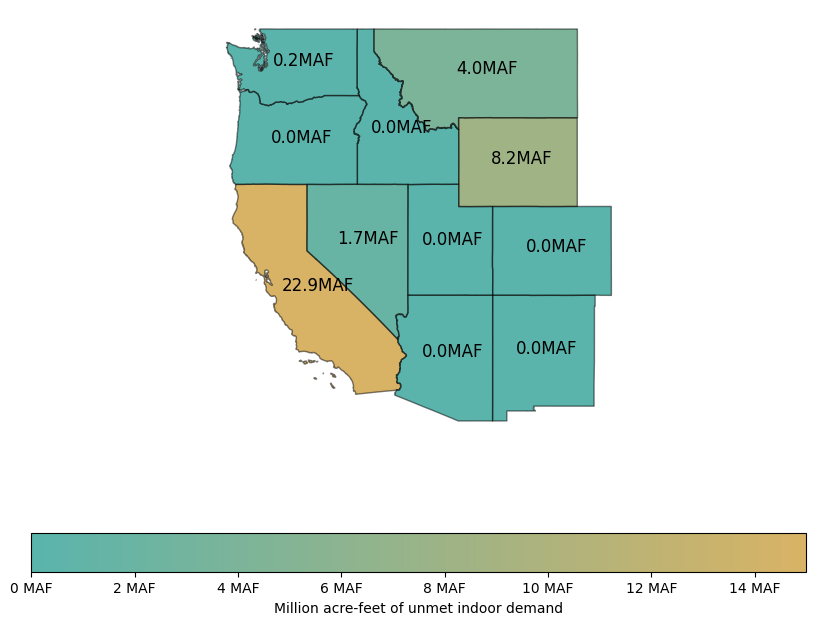

In [197]:
make_state_indoor_maps('CanESM unmet indoor')

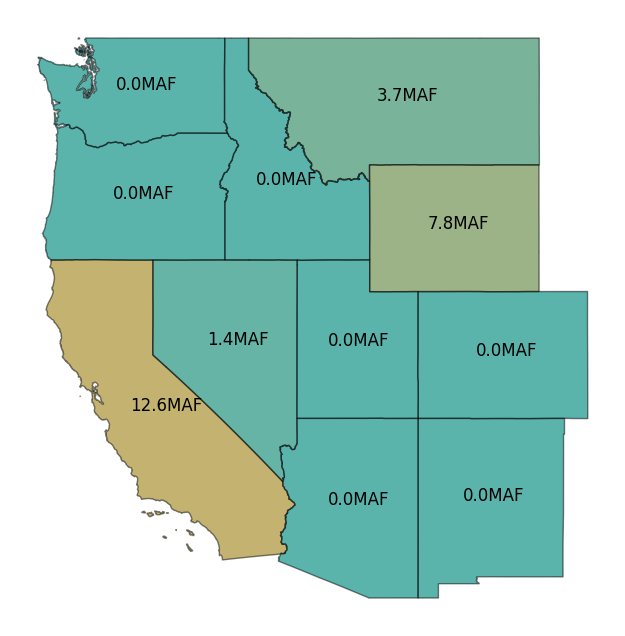

In [161]:
make_state_indoor_maps('CanESM in unmet indoor')

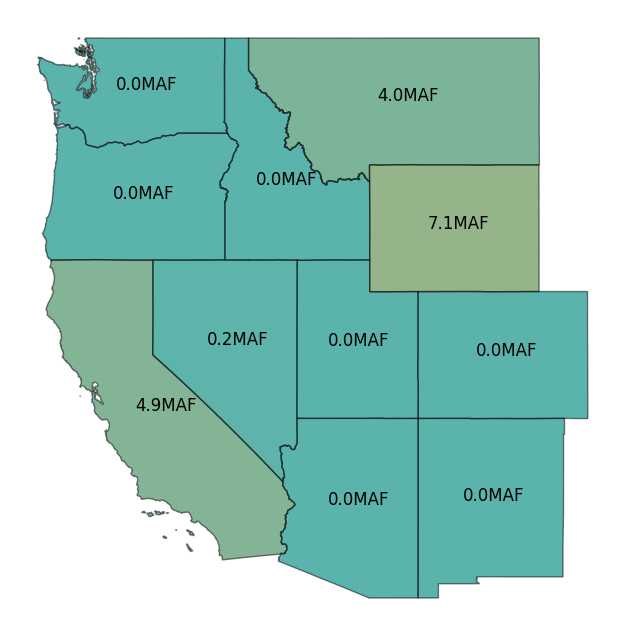

In [162]:
make_state_indoor_maps('CanESM ww unmet indoor')

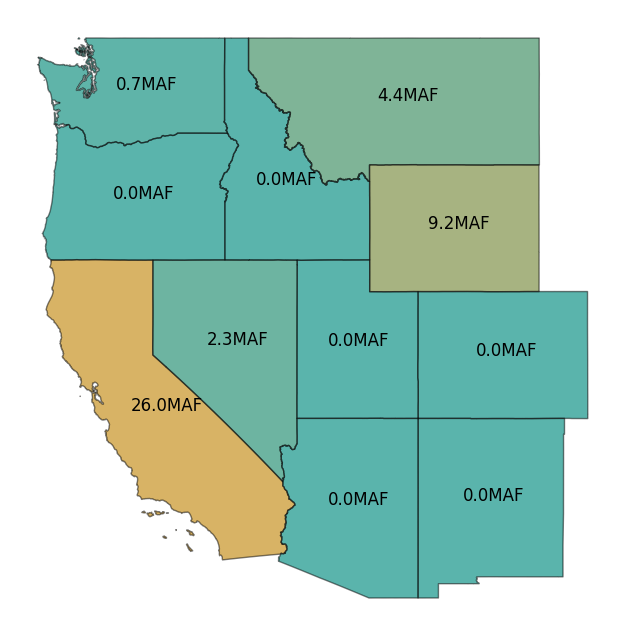

In [163]:
make_state_indoor_maps('CESM1BGC unmet indoor')

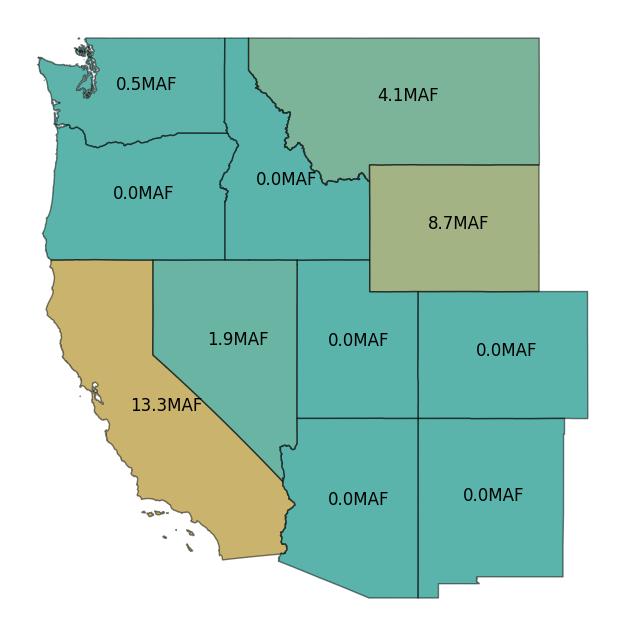

In [164]:
make_state_indoor_maps('CESM1BGC in unmet indoor')

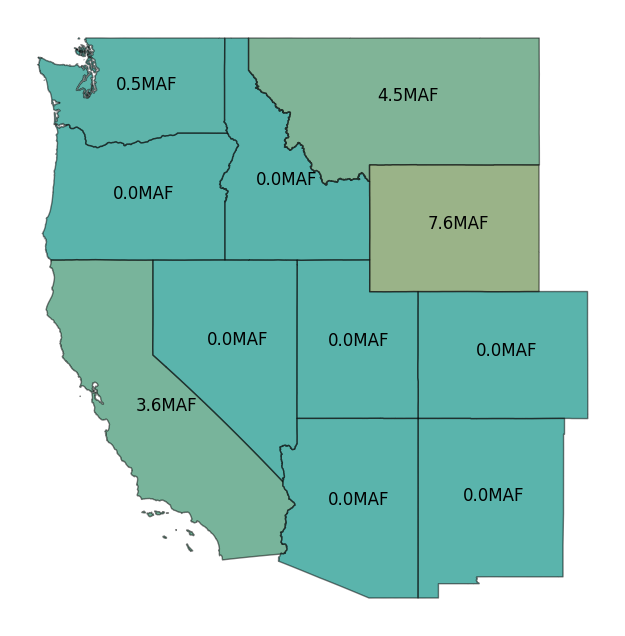

In [165]:
make_state_indoor_maps('CESM1BGC ww unmet indoor')

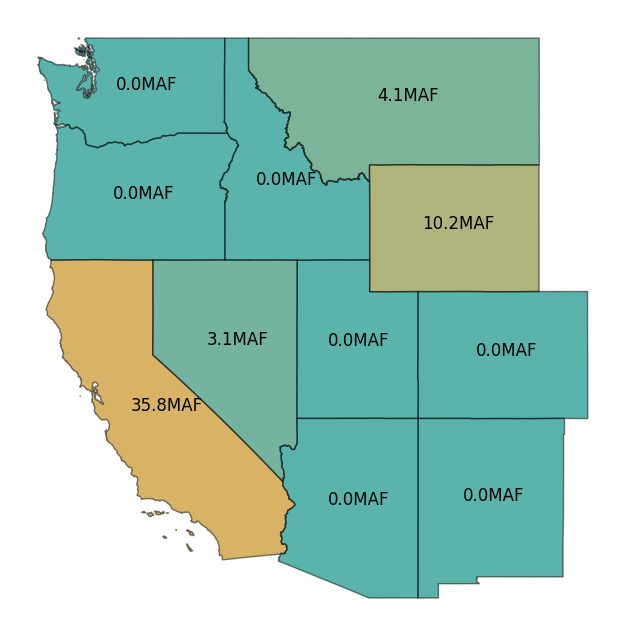

In [166]:
make_state_indoor_maps('CMCCCM unmet indoor')

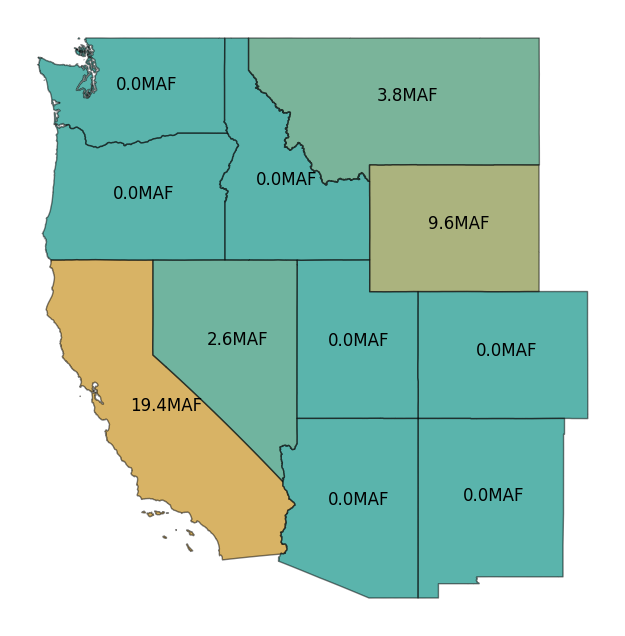

In [167]:
make_state_indoor_maps('CMCCCM in unmet indoor')

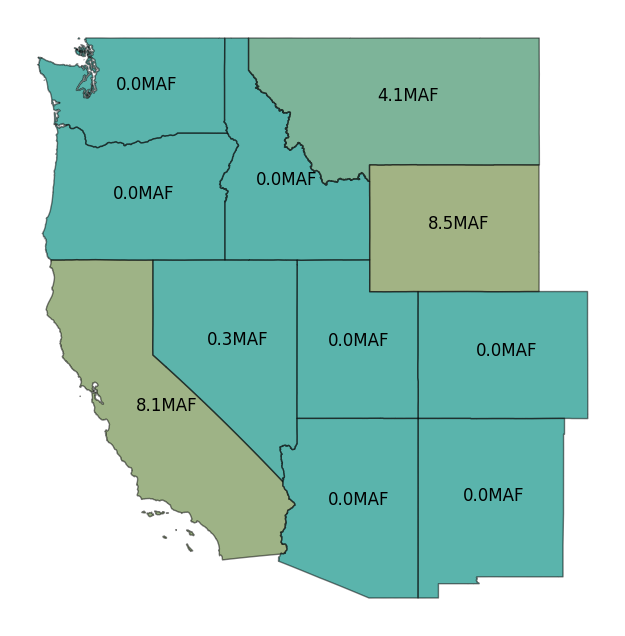

In [168]:
make_state_indoor_maps('CMCCCM ww unmet indoor')

In [58]:
#streamline this code too, if possible!
def get_CanESM_data (df, location_list):
    df = df.set_index('Location')
    percent_list = []
    for location in location_list:
        total_value = dfCanESM[dfCanESM['Date'] > pd.to_datetime('2020-12-31')][location].sum()
        location_value = df.at[location, 'Location_running_total']
        if total_value != 0:
            percent = (location_value / total_value) * 100
        elif location_value > 0:
            percent = 100
        else:
            percent = -100
        percent_list.append(percent)
    else:
        df['Percent'] = percent_list
        df = df.reset_index(drop = False, names='Location')

    return df

def get_CESM1BGC_data (df, location_list):
    df = df.set_index('Location')
    percent_list = []
    for location in location_list:
        total_value = dfCESM1BGC[dfCESM1BGC['Date'] > pd.to_datetime('2020-12-31')][location].sum()
        location_value = df.at[location, 'Location_running_total']
        if total_value != 0:
            percent = (location_value / total_value) * 100
        elif location_value > 0:
            percent = 100
        else:
            percent = -100
        percent_list.append(percent)
    else:
        df['Percent'] = percent_list
        df = df.reset_index(drop = False, names='Location')

    return df

def get_CMCCCM_data (df, location_list):
    df = df.set_index('Location')
    percent_list = []
    for location in location_list:
        total_value = dfCMCCCM[dfCMCCCM['Date'] > pd.to_datetime('2020-12-31')][location].sum()
        location_value = df.at[location, 'Location_running_total']
        if total_value != 0:
            percent = (location_value / total_value) * 100
        elif location_value > 0:
            percent = 100
        else:
            percent = -100
        percent_list.append(percent)
    else:
        df['Percent'] = percent_list
        df = df.reset_index(drop = False, names='Location')

    return df

def get_RefLOCA_data (df, location_list):
    df = df.set_index('Location')
    percent_list = []
    for location in location_list:
        total_value = dfRefLOCA[dfRefLOCA['Date'] > pd.to_datetime('2020-12-31')][location].sum()
        location_value = df.at[location, 'Location_running_total']
        if total_value != 0:
            percent = (location_value / total_value) * 100
        elif location_value > 0:
            percent = 100
        else:
            percent = -100
        percent_list.append(percent)
    else:
        df['Percent'] = percent_list
        df = df.reset_index(drop = False, names='Location')

    return df

In [59]:
def show_location_impacts_table_CanESM (df):
    #this gets the max dates for each location
    max_dates = df.groupby('Location')['Date'].max()
    
    # Merge the maximum dates back into the original DataFrame to get the corresponding rows
    new_df = pd.merge(max_dates.reset_index(), df, on=['Location', 'Date'])
    
    location_list = new_df['Location'].tolist()
    
    new_df = get_CanESM_data (new_df, location_list)
    return new_df


def show_location_impacts_table_CESM1BGC (df):
    #this gets the max dates for each location
    max_dates = df.groupby('Location')['Date'].max()
    
    # Merge the maximum dates back into the original DataFrame to get the corresponding rows
    new_df = pd.merge(max_dates.reset_index(), df, on=['Location', 'Date'])
    
    location_list = new_df['Location'].tolist()
    
    new_df = get_CESM1BGC_data (new_df, location_list)
    return new_df
    
def show_location_impacts_table_CMCCCM (df):
    #this gets the max dates for each location
    max_dates = df.groupby('Location')['Date'].max()
    
    # Merge the maximum dates back into the original DataFrame to get the corresponding rows
    new_df = pd.merge(max_dates.reset_index(), df, on=['Location', 'Date'])
    
    location_list = new_df['Location'].tolist()
    
    new_df = get_CMCCCM_data (new_df, location_list)
    return new_df

def show_location_impacts_table_RefLOCA (df):
    #this gets the max dates for each location
    max_dates = df.groupby('Location')['Date'].max()
    
    # Merge the maximum dates back into the original DataFrame to get the corresponding rows
    new_df = pd.merge(max_dates.reset_index(), df, on=['Location', 'Date'])
    
    location_list = new_df['Location'].tolist()
    
    new_df = get_RefLOCA_data (new_df, location_list)
    return new_df

In [60]:
dfCanESM_in_location_impacts = show_location_impacts_table_CanESM (dfCanESM_in_impacts_indoor_unmet_demand)
dfCESM1BGC_in_location_impacts = show_location_impacts_table_CESM1BGC (dfCESM1BGC_in_impacts_indoor_unmet_demand)
dfCMCCCM_in_location_impacts = show_location_impacts_table_CMCCCM (dfCMCCCM_in_impacts_indoor_unmet_demand)

dfCanESM_ww_location_impacts = show_location_impacts_table_CanESM (dfCanESM_ww_impacts_indoor_unmet_demand)
dfCESM1BGC_ww_location_impacts = show_location_impacts_table_CESM1BGC (dfCESM1BGC_ww_impacts_indoor_unmet_demand)
dfCMCCCM_ww_location_impacts = show_location_impacts_table_CMCCCM (dfCMCCCM_ww_impacts_indoor_unmet_demand)

In [61]:
dfCanESM_in_location_impacts

,Location,Date,Reduction_in_unmet_demand,Running_total,Location_running_total,Month,Year,Percent
0,Unmet_Dem_IN_CA_IID[AF],2070-12-01,1230.0,11435166.0,5938.0,December,2070,2.107052
1,Unmet_Dem_IN_CA_LADWP[AF],2070-06-01,11553.0,10905251.0,108921.0,June,2070,67.768544
2,Unmet_Dem_IN_CA_PGE_BAY[AF],2070-11-01,18580.0,11368290.0,1993662.0,November,2070,43.581726
3,Unmet_Dem_IN_CA_SCE_CEN[AF],2070-12-01,12174.0,11435166.0,1413295.0,December,2070,47.876816
4,Unmet_Dem_IN_CA_SCE_S[AF],2070-12-01,49137.0,11435166.0,6106439.0,December,2070,47.267284
5,Unmet_Dem_IN_CA_SDGE[AF],2070-09-01,3758.0,11192080.0,671869.0,September,2070,47.789344
6,Unmet_Dem_IN_MT_NE[AF],2070-06-01,119.0,10905251.0,3815.0,June,2070,14.601272
7,Unmet_Dem_IN_MT_NW[AF],2025-09-01,2983.0,196075.0,2983.0,September,2025,99.986928
8,Unmet_Dem_IN_MT_SW[AF],2070-12-01,1319.0,11435166.0,298288.0,December,2070,7.650446
9,Unmet_Dem_IN_NV_N[AF],2070-11-01,2922.0,11368290.0,232829.0,November,2070,14.133789


In [62]:
def add_state_value (df):
    state_abbreviations = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
    state_names = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'New Mexico', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming']
    
    #add a column to the df to hold a state value
    df['State'] = None

    #make sure the relevant columns are strings so they can be edited
    df['Location'] = df['Location'].astype(str)
    df['State'] = df['State'].astype(str)
    
    for i in range(len(state_abbreviations)):
        check_string = '_IN_' + state_abbreviations[i]
        for index,row in df.iterrows():
            if check_string in row['Location']:
                df.loc[index, 'State'] = state_names[i]
    return df

In [63]:
def add_state_total(df): 

    df.sort_values(by=['State'], inplace=True)
    
    #create a dictionary to hold key values
    state_dict = {}
    
    #create and initialize variabls needed for the loop 
    running_total=0
    current_state=df['State'].iloc[0]
    
    #loop through each row of the dataframe
    for index, row in df.iterrows():
        #if the current state is the same as the state variable
        if current_state == df.at[index,'State']:
            #add to the running total and save the index of the row for later use
            running_total = running_total + df.at[index, 'Location_running_total']
        else:
            #if the state isn't the same as from the previous row
            #add to the dictionary
            state_dict.update({current_state: running_total})
            
            #update the variables needed to run the loop
            running_total = df.at[index, 'Location_running_total']
            current_state= df.at[index,'State']

    #after the loop is done running, add the final few rows of data
    else:
        state_dict.update({current_state: running_total})
    
    return state_dict

In [64]:
def add_adaptation_impact(gdf, impact_dict, column_name):

    gdf[column_name] = gdf['NAME'].map(impact_dict)
    return


In [65]:
indoor_impact_dfs = [dfCanESM_in_location_impacts, dfCESM1BGC_in_location_impacts, dfCMCCCM_in_location_impacts, 
                     dfCanESM_ww_location_impacts, dfCESM1BGC_ww_location_impacts, dfCMCCCM_ww_location_impacts]

impact_column_name = ['CanESM indoor impact', 'CESM1BGC indoor impact', 'CMCCCM indoor impact', 
                      'CanESM ww impact', 'CESM1BGC ww impact', 'CMCCCM ww impact']

for df, column_name in zip(indoor_impact_dfs, impact_column_name):
    add_state_value(df)
    state_dict = add_state_total(df)
    add_adaptation_impact(western_states, state_dict, column_name)


C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is tryin

In [67]:
western_states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2060 CMCCCM MAR vs no adaptation,2050 CanESM MAR vs no adaptation,2050 CESM1BGC MAR vs no adaptation,2050 CMCCCM MAR vs no adaptation,CanESM indoor impact,CESM1BGC indoor impact,CMCCCM indoor impact,CanESM ww impact,CESM1BGC ww impact,CMCCCM ww impact
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",...,5.915318,14.428690,1.217719,5.113633,NaN,NaN,NaN,NaN,NaN,NaN
11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.57039 48.53785, -122.5686...",...,40.083019,9.011448,1.257725,61.037480,176414.0,219157.0,31048.0,190142.0,220784.0,32014.0
12,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995...",...,0.065590,-0.003811,0.061414,0.109829,NaN,NaN,NaN,NaN,NaN,NaN
16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",...,1.596000,7.393741,17.912817,1.345392,10300124.0,12750302.0,16551279.0,18000604.0,22376480.0,27775202.0
21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,0.321340,0.522085,0.173717,-0.017527,NaN,NaN,NaN,NaN,NaN,NaN
22,49,01455989,0400000US49,49,UT,Utah,00,212886221680,6998824394,"POLYGON ((-114.05296 37.59278, -114.05247 37.6...",...,5.996669,24.965619,9.138357,5.816513,NaN,NaN,NaN,NaN,NaN,NaN
24,56,01779807,0400000US56,56,WY,Wyoming,00,251458544898,1867670745,"POLYGON ((-111.05456 45.00096, -111.04507 45.0...",...,0.164933,5.203255,3.463605,0.393080,420713.0,509807.0,531075.0,1109396.0,1533383.0,1629339.0
28,32,01779793,0400000US32,32,NV,Nevada,00,284329506470,2047206072,"POLYGON ((-120.00574 39.22866, -120.00559 39.2...",...,-0.016044,0.187723,-0.002493,0.034795,232829.0,384761.0,410802.0,1433364.0,2261137.0,2739959.0
31,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,"POLYGON ((-116.04914 48.50205, -116.04913 48.5...",...,0.656154,8.832741,1.229373,1.772690,305086.0,344023.0,309390.0,-49467.0,-41431.0,-57485.0
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",...,-0.073211,-0.103010,0.015218,-0.007195,NaN,NaN,NaN,NaN,NaN,NaN


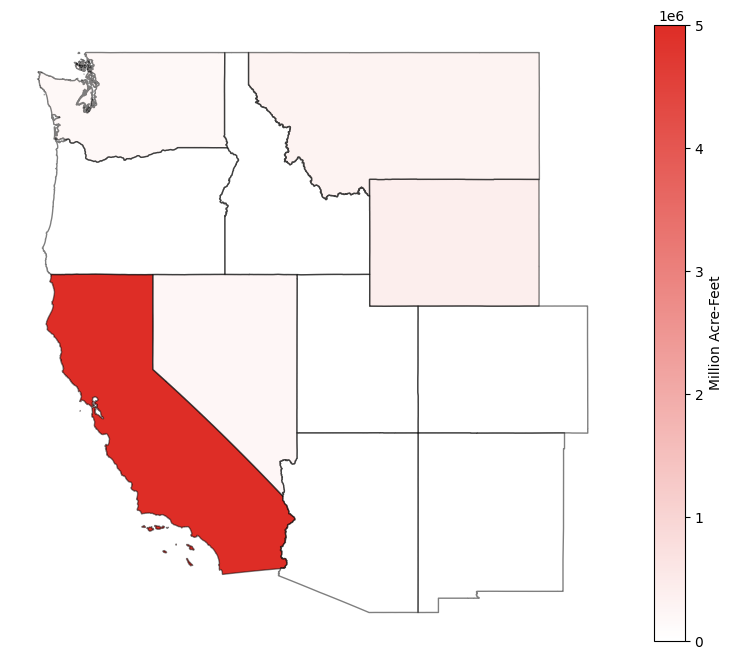

In [68]:
make_state_indoor_maps('CanESM indoor impact')

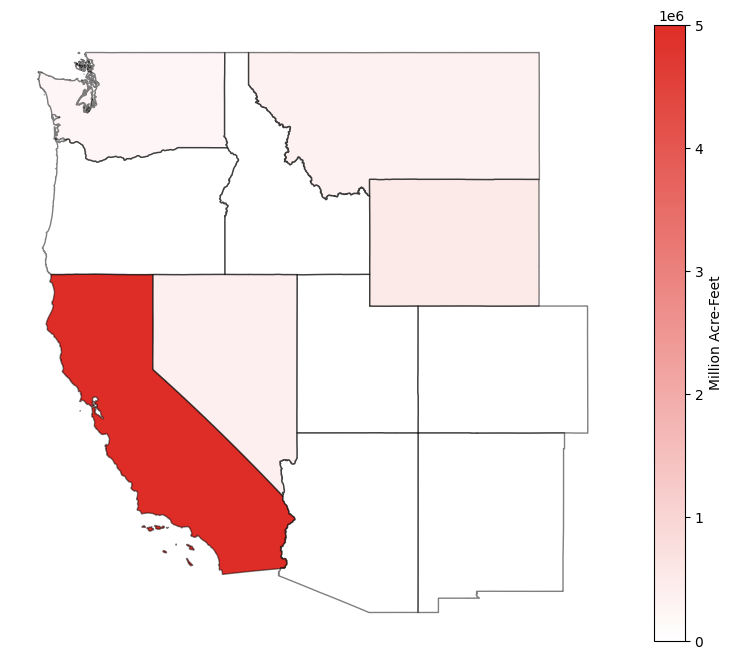

In [69]:
make_state_indoor_maps('CESM1BGC indoor impact')

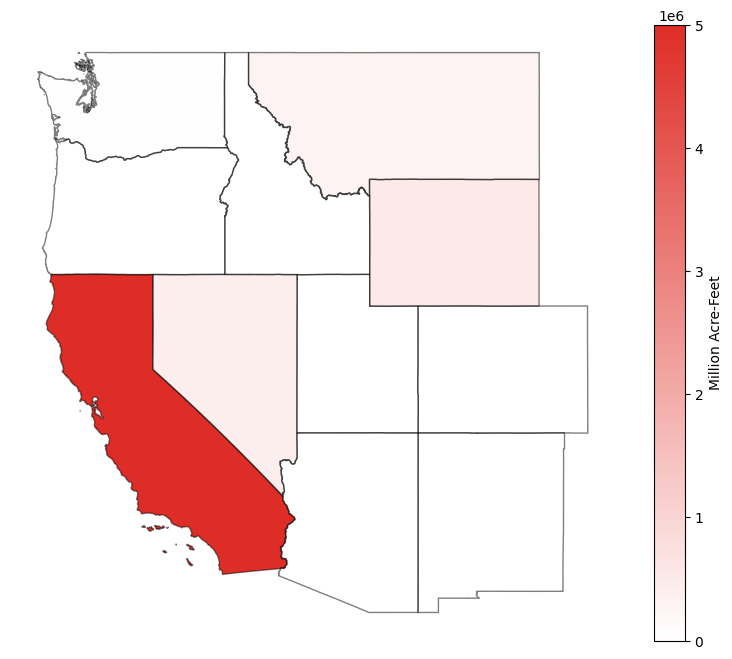

In [70]:
make_state_indoor_maps('CMCCCM indoor impact')

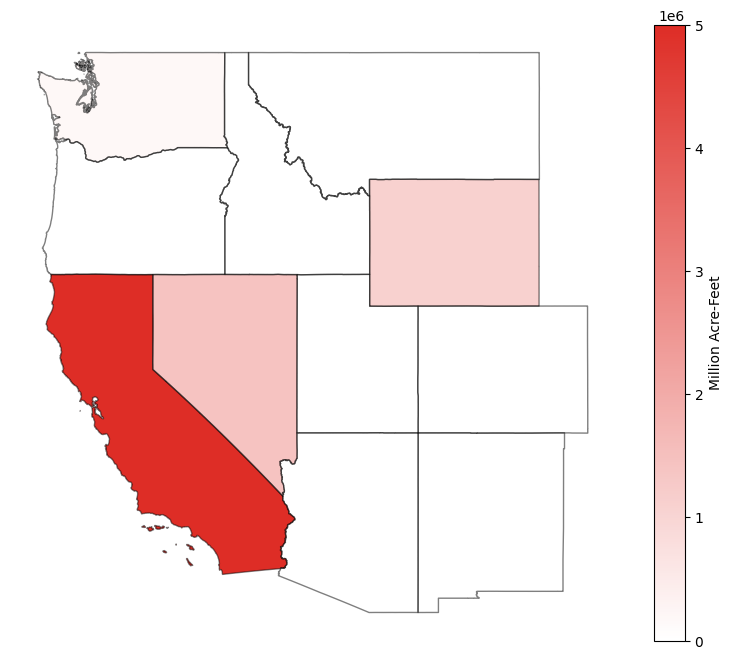

In [71]:
make_state_indoor_maps('CanESM ww impact')

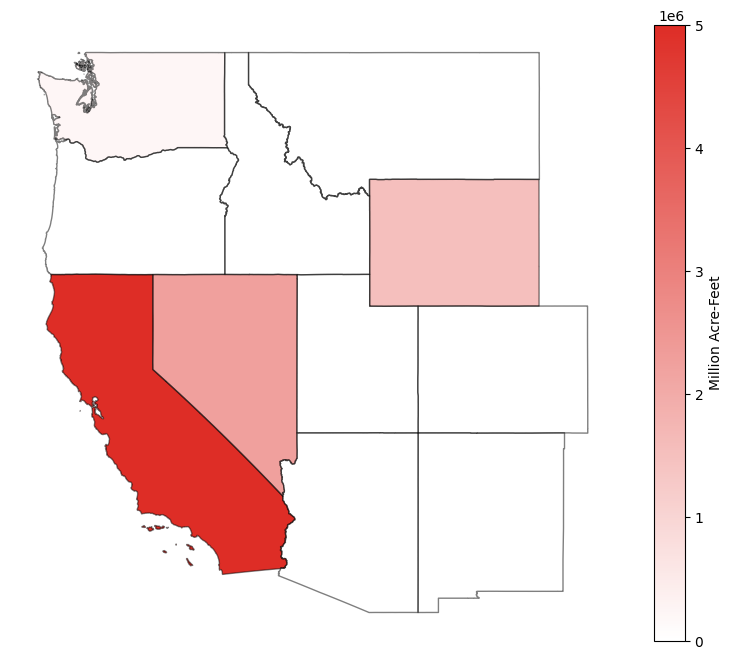

In [72]:
make_state_indoor_maps('CESM1BGC ww impact')

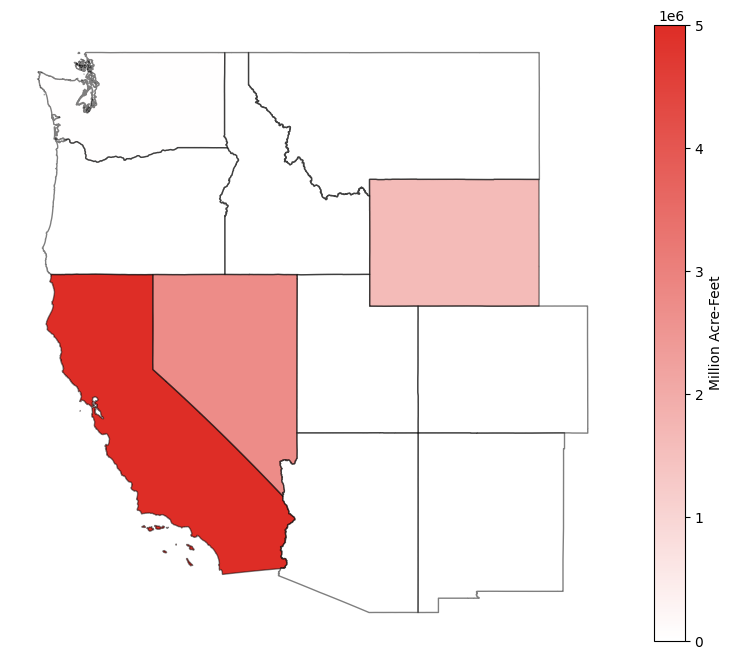

In [73]:
make_state_indoor_maps('CMCCCM ww impact')

In [95]:
# western_states

In [142]:
# add_state_total(dfCESM1BGC_in_location_impacts)

{'California': np.float64(12750302.0),
 'Montana': np.float64(344023.0),
 'Nevada': np.float64(384761.0),
 'Washington': np.float64(219157.0),
 'Wyoming': np.float64(509807.0)}

In [141]:
dfCESM1BGC_in_location_impacts

,Location,Date,Reduction_in_unmet_demand,Running_total,Location_running_total,Month,Year,Percent,State
0,Unmet_Dem_IN_CA_IID[AF],2068-12-01,1206.0,12822556.0,8980.0,December,2068,4.483069,California
1,Unmet_Dem_IN_CA_LADWP[AF],2070-05-01,7705.0,13694906.0,120398.0,May,2070,77.658213,California
2,Unmet_Dem_IN_CA_PGE_BAY[AF],2070-10-01,26105.0,14133501.0,1850681.0,October,2070,45.922437,California
3,Unmet_Dem_IN_CA_SCE_CEN[AF],2070-11-01,12415.0,14202235.0,1852154.0,November,2070,50.762851,California
4,Unmet_Dem_IN_CA_SCE_S[AF],2070-11-01,50192.0,14202235.0,8105720.0,November,2070,50.644718,California
5,Unmet_Dem_IN_CA_SDGE[AF],2070-09-01,8008.0,14017495.0,812369.0,September,2070,45.135393,California
6,Unmet_Dem_IN_MT_NE[AF],2070-09-01,832.0,14017495.0,9172.0,September,2070,16.420821,Montana
7,Unmet_Dem_IN_MT_NW[AF],2070-10-01,1120.0,14133501.0,9646.0,October,2070,9.351593,Montana
8,Unmet_Dem_IN_MT_SW[AF],2070-12-01,863.0,14208050.0,325205.0,December,2070,7.716140,Montana
9,Unmet_Dem_IN_NV_N[AF],2070-12-01,2808.0,14208050.0,384761.0,December,2070,16.690525,Nevada


In [133]:
dfCanESM_ww_location_impacts

,Location,Date,Reduction_in_unmet_demand,Running_total,Location_running_total,Month,Year,Percent,State
0,Unmet_Dem_IN_CA_IID[AF],2070-12-01,12755.0,20684039.0,191.0,December,2070,0.067775,California
1,Unmet_Dem_IN_CA_LADWP[AF],2070-06-01,12056.0,19363005.0,160726.0,June,2070,100.000615,California
2,Unmet_Dem_IN_CA_PGE_BAY[AF],2070-11-01,38753.0,20555580.0,2858871.0,November,2070,62.495314,California
3,Unmet_Dem_IN_CA_SCE_CEN[AF],2070-12-01,19814.0,20684039.0,2615031.0,December,2070,88.586854,California
4,Unmet_Dem_IN_CA_SCE_S[AF],2070-12-01,78150.0,20684039.0,11110820.0,December,2070,86.004016,California
5,Unmet_Dem_IN_CA_SDGE[AF],2070-09-01,3758.0,20082862.0,1254965.0,September,2070,89.264356,California
6,Unmet_Dem_IN_MT_NE[AF],2070-06-01,-34.0,19363005.0,-817.0,June,2070,-3.126930,Montana
7,Unmet_Dem_IN_MT_NW[AF],2025-09-01,2983.0,318028.0,2983.0,September,2025,99.986928,Montana
8,Unmet_Dem_IN_MT_SW[AF],2070-12-01,67.0,20684039.0,-51633.0,December,2070,-1.324275,Montana
9,Unmet_Dem_IN_NV_N[AF],2070-11-01,9573.0,20555580.0,1433364.0,November,2070,87.011772,Nevada


In [134]:
dfCMCCCM_ww_location_impacts

,Location,Date,Reduction_in_unmet_demand,Running_total,Location_running_total,Month,Year,Percent,State
0,Unmet_Dem_IN_CA_LADWP[AF],2070-10-01,2208.0,31716966.0,377944.0,October,2070,99.142303,California
1,Unmet_Dem_IN_CA_PGE_BAY[AF],2070-12-01,37896.0,32119029.0,4366096.0,December,2070,55.247706,California
2,Unmet_Dem_IN_CA_SCE_CEN[AF],2070-12-01,33470.0,32119029.0,4145054.0,December,2070,84.685325,California
3,Unmet_Dem_IN_CA_SCE_S[AF],2070-12-01,132009.0,32119029.0,16719050.0,December,2070,84.614971,California
4,Unmet_Dem_IN_CA_SDGE[AF],2070-11-01,1505.0,31871759.0,2167058.0,November,2070,90.169416,California
5,Unmet_Dem_IN_MT_NE[AF],2070-09-01,-56.0,31546951.0,-677.0,September,2070,-1.422645,Montana
6,Unmet_Dem_IN_MT_SW[AF],2070-12-01,-74.0,32119029.0,-56808.0,December,2070,-1.427974,Montana
7,Unmet_Dem_IN_NV_N[AF],2070-12-01,29882.0,32119029.0,2739959.0,December,2070,89.707433,Nevada
8,Unmet_Dem_IN_WA_SEATAC[AF],2070-09-01,880.0,31546951.0,32014.0,September,2070,100.002988,Washington
9,Unmet_Dem_IN_WY_NE[AF],2070-12-01,5563.0,32119029.0,402394.0,December,2070,9.874599,Wyoming


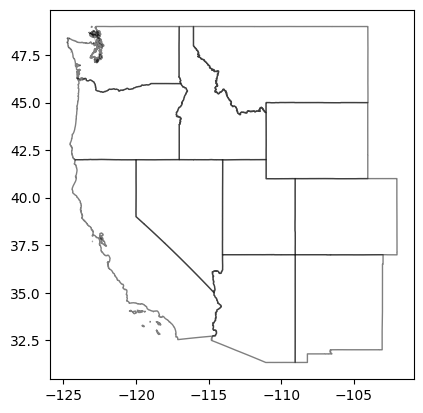

In [57]:
fig, ax = plt.subplots()  # Create a new figure and axis

# catchments_CanESM.plot(column='Temp_rank', categorical = True, cmap=CB_color_cycle, figsize=(10, 8))

end_values = df

# western_states['boundary'] = western_states.boundary
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black', figsize=(20,16))

plt.show()

In [46]:
# # Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames
# fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
# norm = colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=3)

# catchments_CMCCCM.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# # Plot the second GeoDataFrame with transparency and edge color
# western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

# ax.set_axis_off()
# # plt.colorbar(sm, cax=cax, label='Relative wetness')  # Add a label to the legend

# plt.title('Percent change in precipitation in CMCCCM scenario', fontsize=16)
# plt.show()

In [47]:
# # Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames
# fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['#A52A2A', '#D3D3D3', '#00008B'])
# norm = colors.TwoSlopeNorm(vmin=-40, vcenter=0, vmax=40)

# catchments_CESM1BGC.plot(column='precip_difference', cmap=cmap, norm=norm, ax=plt.gca(), legend=True)

# # Plot the second GeoDataFrame with transparency and edge color
# western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

# ax.set_axis_off()
# # plt.colorbar(sm, cax=cax, label='')  # Add a label to the legend

# plt.title('Percent change in precipitation in CESM1BGC scenario', fontsize=16)
# plt.show()

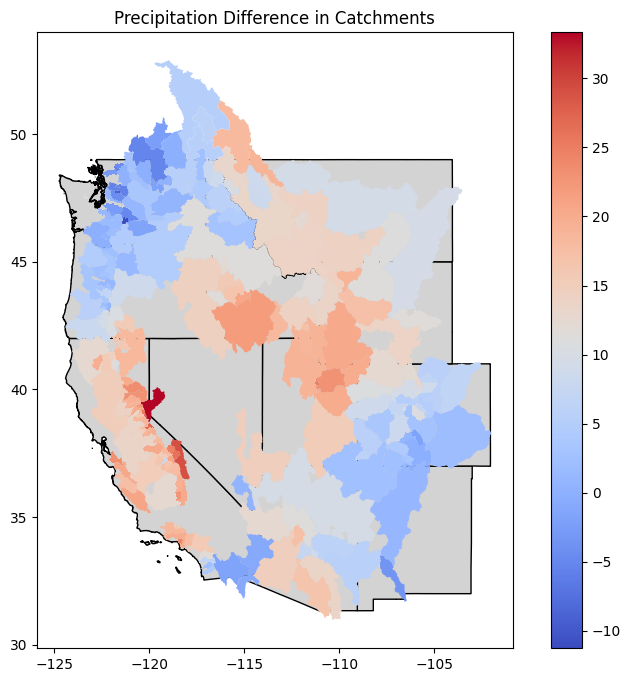

In [48]:
western_states.plot(figsize=(10, 8), color='lightgray', edgecolor='black')

# Plot the catchment_CanESM with color based on 'precip_difference'
catchments_CanESM.plot(column='precip_difference', cmap='coolwarm', ax=plt.gca(), legend=True)

plt.title('Precipitation Difference in Catchments')
plt.show()

In [49]:
def calculate_dryness_score(df):
    dryness_score_list = []
    score = 0
    for index,row in df.iterrows():
        if row['Precip_rank'] == 'max':
            score += 1
        elif row['Precip_rank'] == 'mid':
            score += 2
        else:
            score += 3
    
        if row['Temp_rank'] == 'max':
            score += 3
        elif row['Temp_rank'] == 'mid':
            score += 2
        else:
            score += 1
        dryness_score_list.append(score)
        score = 0
    df['Dryness_score'] = dryness_score_list

    return df

In [50]:
# Assuming your DataFrame is named 'df'
df_catchment_data = calculate_dryness_score(df_catchment_data)
# df_catchment_data

KeyError: 'Precip_rank'

In [ ]:
# catchments_CanESM = catchments_CanESM.drop('geometry', axis=1)
# catchments_CESM1BGC = catchments_CESM1BGC.drop('geometry', axis=1)
# catchments_CMCCCM = catchments_CMCCCM.drop('geometry', axis=1)

# catchments_CanESM.to_csv('catchment_CanESM.csv', index=False)
# catchments_CESM1BGC.to_csv('catchment_CESM1BGC.csv', index=False)
# catchments_CMCCCM.to_csv('catchment_CMCCCM.csv', index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CanESM.plot(ax=ax, column='Temp_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Temperature Rank Map')
plt.show()

KeyError: 'Temp_rank'

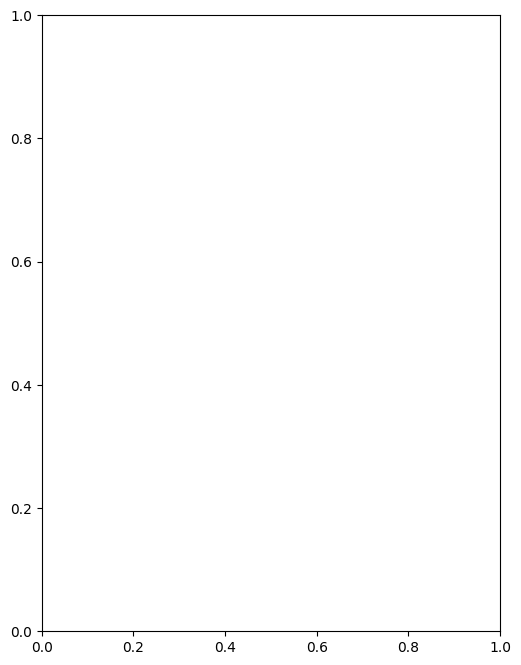

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CESM1BGC.plot(ax=ax, column='Temp_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Temperature Rank Map')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CMCCCM.plot(ax=ax, column='Temp_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Temperature Rank Map')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CanESM.plot(ax=ax, column='Precip_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Precip Rank Map')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CESM1BGC.plot(ax=ax, column='Precip_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Precip Rank Map')
plt.show()

KeyError: 'Precip_rank'

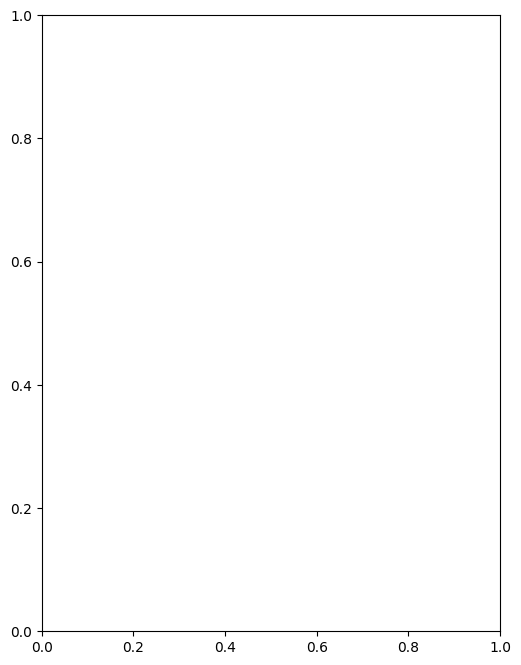

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CMCCCM.plot(ax=ax, column='Precip_rank', categorical=True, legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Precip Rank Map')
plt.show()

In [ ]:
# Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Define a custom colormap
cmap = plt.cm.viridis  # Choose a colormap you prefer
norm = plt.Normalize(vmin=2, vmax=6)  # Set the normalization range (2 to 6)

# Plot the first GeoDataFrame with the custom colormap
catchments_CanESM.plot(ax=ax, column='Dryness_score', cmap='Reds', norm=norm)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) # (x position, y position, width, height)

# Create a colorbar with the custom range
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])  # This is a trick to generate the legend

ax.set_axis_off()
plt.colorbar(sm, cax=cax, label='Relative wetness and dryness')  # Add a label to the legend

plt.title('Dryness Rank Map', fontsize=16)
plt.show()

KeyError: 'Dryness_score'

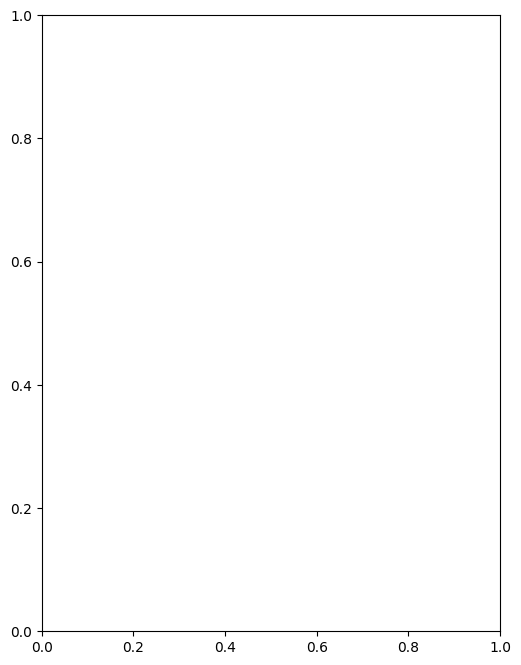

In [53]:
# Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames

fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Define a custom colormap
cmap = plt.cm.viridis  # Choose a colormap you prefer
norm = plt.Normalize(vmin=2, vmax=6)  # Set the normalization range (2 to 6)

# Plot the first GeoDataFrame with the custom colormap
catchments_CESM1BGC.plot(ax=ax, column='Dryness_score', cmap='Reds', norm=norm)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) # (x position, y position, width, height)

# Create a colorbar with the custom range
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])  # This is a trick to generate the legend

ax.set_axis_off()
plt.colorbar(sm, cax=cax, label='Dryness Score (2-6)')  # Add a label to the legend

plt.title('Dryness Rank Map')
plt.show()

KeyError: 'Dryness_score'

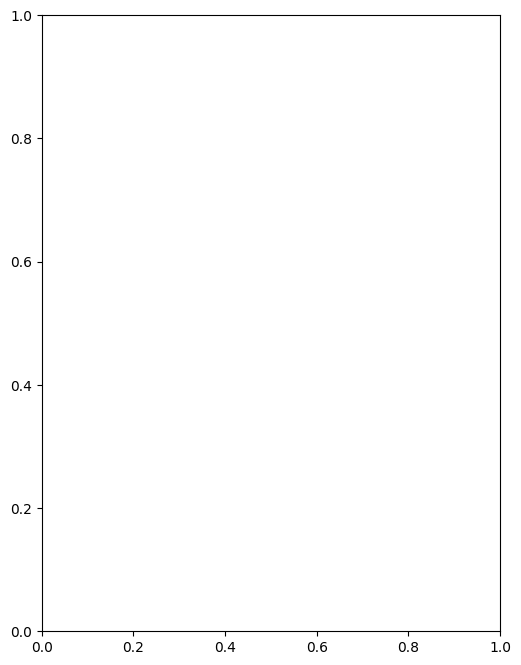

In [54]:
# Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames

fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Define a custom colormap
cmap = plt.cm.viridis  # Choose a colormap you prefer
norm = plt.Normalize(vmin=2, vmax=6)  # Set the normalization range (2 to 6)

# Plot the first GeoDataFrame with the custom colormap
catchments_CMCCCM.plot(ax=ax, column='Dryness_score', cmap='Reds', norm=norm)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) # (x position, y position, width, height)

# Create a colorbar with the custom range
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])  # This is a trick to generate the legend

ax.set_axis_off()
plt.colorbar(sm, cax=cax, label='Dryness Score (2-6)')  # Add a label to the legend

plt.title('Dryness Rank Map')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Define a custom colormap
cmap = plt.cm.viridis  # Choose a colormap you prefer
norm = plt.Normalize(vmin=2, vmax=6)  # Set the normalization range (2 to 6)

# Plot the first GeoDataFrame with the custom colormap
catchments_CESM1.plot(ax=ax, column='Dryness_score', cmap=cmap, norm=norm)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) # (x position, y position, width, height)

# Create a colorbar with the custom range
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is a trick to generate the legend

plt.colorbar(sm, cax=cax, label='Dryness Score (2-6)')  # Add a label to the legend

plt.title('Dryness Rank Map')
plt.show()

KeyError: 'Dryness_score'

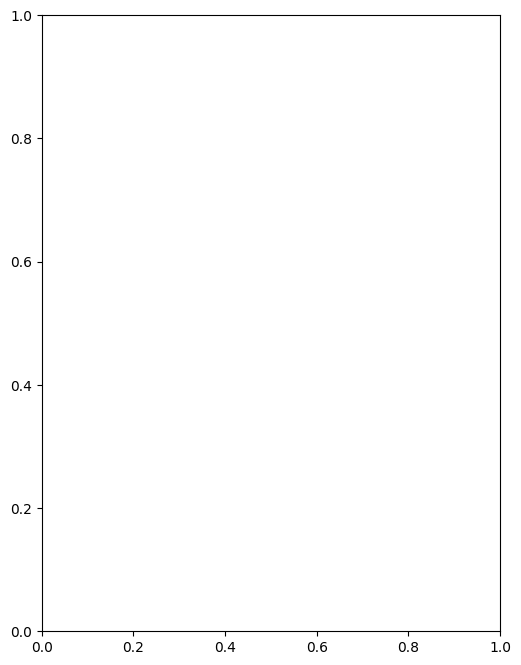

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CanESM.plot(ax=ax, column='Dryness_score', legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Dryness Rank Map')
plt.show()

KeyError: 'Dryness_score'

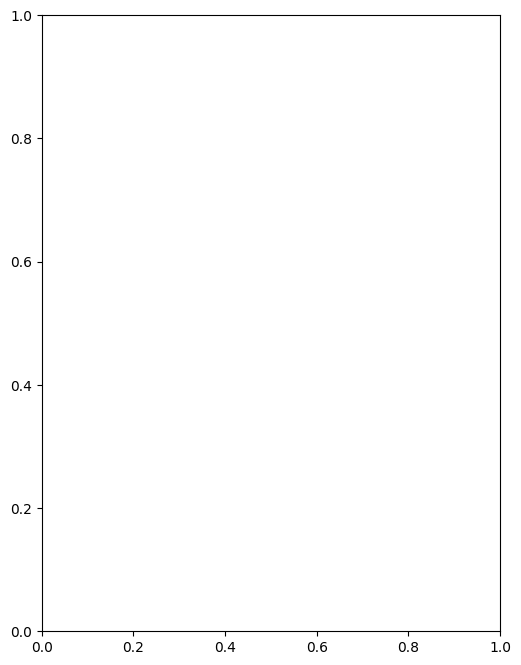

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CESM1BGC.plot(ax=ax, column='Dryness_score', legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Dryness Rank Map')
plt.show()

KeyError: 'Dryness_score'

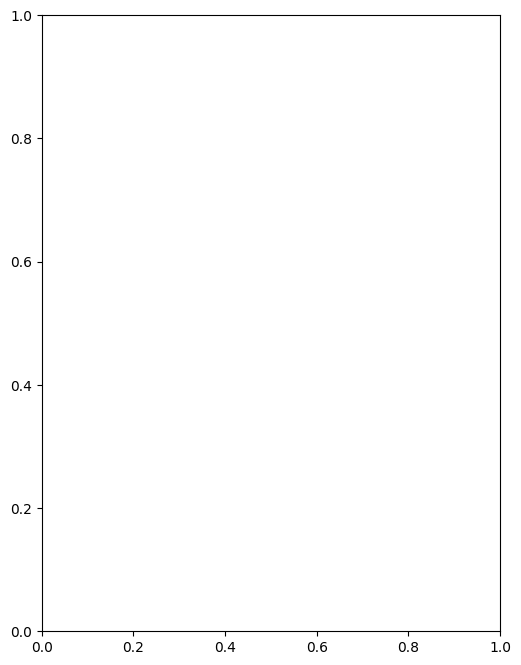

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# Plot the first GeoDataFrame directly on the axis
catchments_CMCCCM.plot(ax=ax, column='Dryness_score', legend=True)

# Plot the second GeoDataFrame with transparency and edge color
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

plt.title('Dryness Rank Map')
plt.show()

In [58]:
# # Define a colormap
# CB_color_cycle = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a'])

# # Plot the GeoDataFrame, coloring by 'Temp_rank'
# catchments_CanESM.plot(column='Temp_rank', categorical = True, cmap=CB_color_cycle, figsize=(10, 8))

# # Add a title and legend
# plt.title('Temperature Rank Map')
# plt.legend(title='Temperature Rank')

# plt.show()

KeyError: 'Precip_rank'

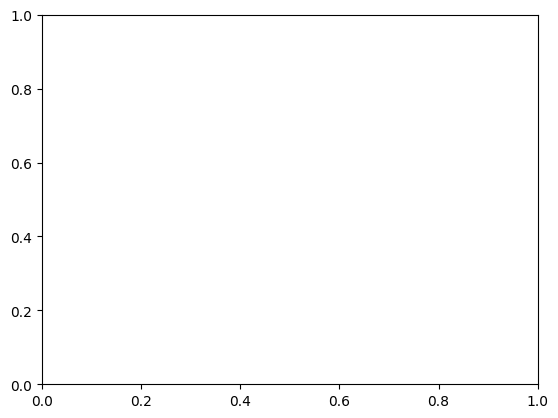

In [59]:
fig, ax = plt.subplots()  # Create a new figure and axis

max_temp_polygons = catchments_CanESM[catchments_CanESM['Precip_rank'] == 'max']
mid_temp_polygons = catchments_CanESM[catchments_CanESM['Precip_rank'] == 'mid']
min_temp_polygons = catchments_CanESM[catchments_CanESM['Precip_rank'] == 'min']

# Plot the GeoDataFrame, coloring by 'Temp_rank'
max_temp_polygons.plot(ax=ax, color='red')
mid_temp_polygons.plot(ax=ax, color='yellow')
min_temp_polygons.plot(ax=ax, color='blue')

# western_states['boundary'] = western_states.boundary
western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black', figsize=(20,16))

# Add a title and legend (assuming the colormap has a meaningful legend)
plt.title('Temperature Rank Map')
plt.legend(title='Temperature Rank')

plt.show()

ValueError: aspect must be finite and positive 

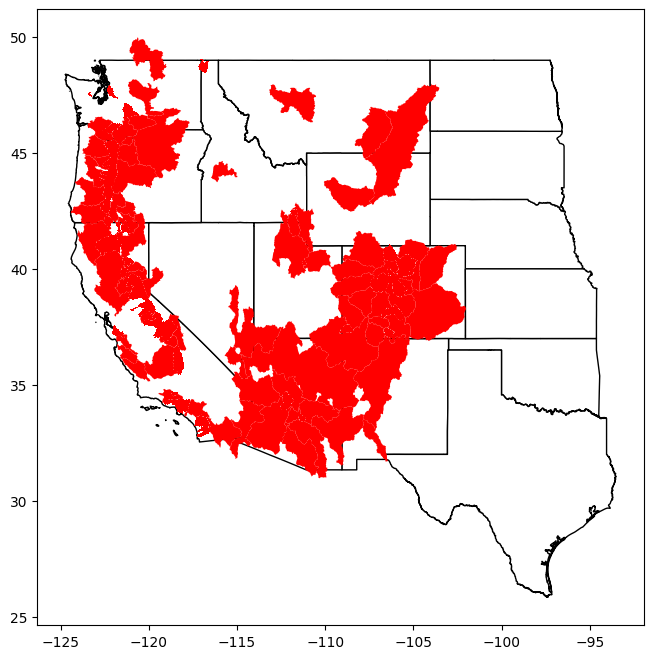

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size (optional)

# Plot the base layer (western states)
western_states.plot(ax=ax, color='white', edgecolor='black')

# Filter polygons based on 'Temp_rank'
max_temp_polygons = catchments_CanESM[catchments_CanESM['Temp_rank'] == 'max']
mid_temp_polygons = catchments_CanESM[catchments_CanESM['Temp_rank'] == 'mid']
min_temp_polygons = catchments_CanESM[catchments_CanESM['Temp_rank'] == 'min']

# Plot the filtered polygons with specific colors
max_temp_polygons.plot(ax=ax, color='red')

# Try simplifying geometry (optional)
mid_temp_polygons = mid_temp_polygons.simplify(tolerance=0.001)  # Experiment with tolerance

mid_temp_polygons.plot(ax=ax, color='yellow')
min_temp_polygons.plot(ax=ax, color='blue')

# Set aspect ratio (optional)
ax.set_aspect('equal')  # Experiment with this if needed

# Add a title and legend
plt.title('Temperature Rank Map')
plt.legend(title='Temperature Rank')

plt.show()

In [14]:
# #add a max, mid, and min rank for precip in each catchment based on climate scenario
# df_catchment_data.sort_values(by=['Catchment_name', 'avg_Precip_km3'], ascending=[True, False], inplace=True)
# rank_values = ['max', 'mid', 'min'] * (len(df_catchment_data) // 3)
# df_catchment_data['Precip_rank'] = pd.Categorical(rank_values[:len(df_catchment_data)], categories=['max', 'mid', 'min'])
# df_catchment_data

In [15]:
# #add a max, mid, and min rank for temp in each catchment based on climate scenario
# df_catchment_data.sort_values(by=['Catchment_name', 'avg_tavg.C'], ascending=[True, False], inplace=True)
# rank_values = ['max', 'mid', 'min'] * (len(df_catchment_data) // 3)
# df_catchment_data['Temp_rank'] = pd.Categorical(rank_values[:len(df_catchment_data)], categories=['max', 'mid', 'min'])
# df_catchment_data

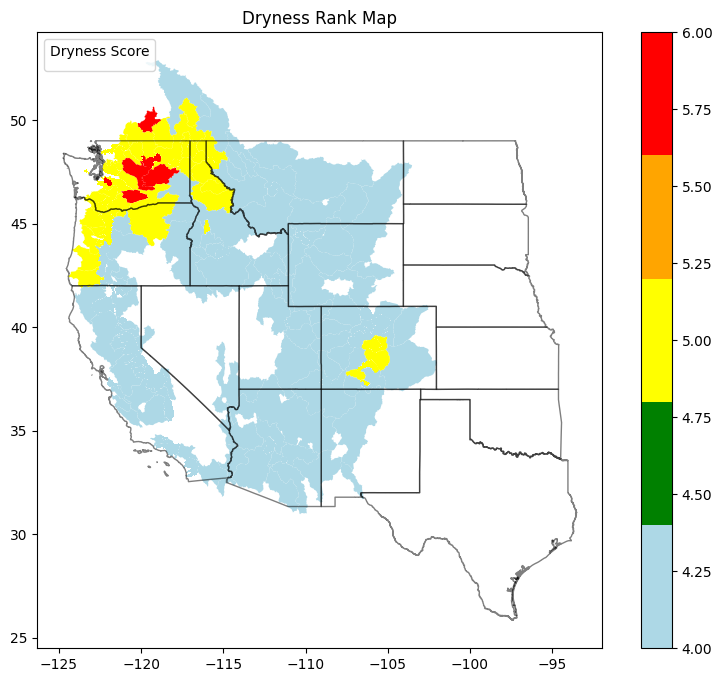

In [36]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# # Assuming 'catchments_CanESM' and 'western_states' are your GeoDataFrames

# # Define a list of colors (assuming 5 dryness ranks)
# colors = ['lightblue', 'green', 'yellow', 'orange', 'red']
# cmap = ListedColormap(colors)

# # Define labels for each dryness rank (replace with your labels)
# rank_labels = ['2', '3', '4', '5', '6']

# fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and axis

# # Plot the first GeoDataFrame with the custom colormap
# catchments_CanESM.plot(ax=ax, column='Dryness_score', cmap=cmap, legend=True)

# # Plot the second GeoDataFrame with transparency and edge color
# western_states.plot(ax=ax, facecolor='none', alpha=0.5, edgecolor='black')

# # Create a legend with custom labels
# plt.legend(loc='upper left', labels=rank_labels, title='Dryness Score')

# plt.title('Dryness Rank Map')
# plt.show()

In [7]:
# print(western_states.crs)
# print(catchments.crs)

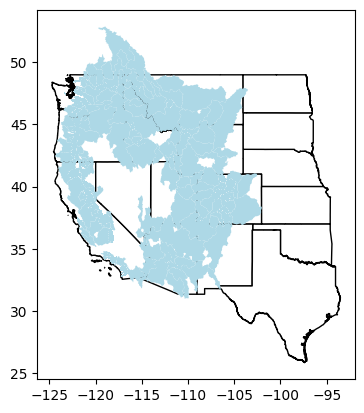

In [9]:
fig, ax = plt.subplots()  # Create a new figure and axis

# Plot the western states
western_states.plot(ax=ax, color='white', edgecolor='black')

# Plot catchments on top
catchments.plot(ax=ax, color='lightblue')

plt.show()

In [70]:
#update catchment names
# SanJoNorth = catchments[catchments['Name'].isin([
#     'CA_PGE_CEN_San Jo Valley'
# ])]

# SanJoNorth.plot()

In [8]:
# fig, ax = plt.subplots()  # Create a new figure and axis

# # Plot the western states
# western_states.plot(ax=ax, color='white', edgecolor='black')

# # Plot Colorado on top
# colorado.plot(ax=ax, color='lightblue')

# plt.show()